In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

### Data preprocessing

**Reading the dataset**

In [3]:
dt_baseball = pd.read_csv('mlbbat10.csv')

*Investigating the number of columns and elements that the table has. Which is 1199 elements (players) with 19 columns*

In [4]:
dt_baseball.shape

(1199, 19)

*Initially it will be analyzed which are the columns that the dataset has:*

In [5]:
dt_baseball.columns

Index(['name', 'team', 'position', 'game', 'at_bat', 'run', 'hit', 'double',
       'triple', 'home_run', 'rbi', 'total_base', 'walk', 'strike_out',
       'stolen_base', 'caught_stealing', 'obp', 'slg', 'bat_avg'],
      dtype='object')

*If you don't understand baseball that's fine, i'll help you understand what each column means.*



*   **name** : the name of the player
*   **team** : the player's team
*   **position** : the player's position
*   **game** : how many games did he play
*   **at_bat** : the number of times the player had time at bat against a pitcher
*   **run** : is the number of runs the player has made safely around 3 bases and back safely before 3 outs are made.
*   **hit** : how many times did the player reach safety after hitting the ball
*   **double** : how many times did the player hit the pitched ball and safely reached second base
*   **triple** : how many times did the player hit the ball and reached third base, without the help of an intervening error or attempt to put out another baserunner.
*   **home run** : how many times the player did hit the ball and was able to circle the bases and reach home plate safely.
*   **rbi** : is how many times the player who did the batter made a play the allowed a run to be scored.
*   **total_base** : how many bases the player gained with hits.
*   **walk** : how many times the player (batter) received four piches during a plate appearance.
*   **strike_out** : how many times the player recieve three strikes during a time at the bat.
*   **stolen_base** : how many times the player made a stolen base, which is when the player advances to a base.
*   **caught_stealing** : how many times the player was caught stealing, which is when the runner attempts to advance from one to another without the ball being batted and is tagged out by other player (fielder).
*   **obp** : it is called ob base percentage, and is how frequently a batter reaches base per plate appearance.
*   **slg** : it is called slugging percentage, and represents the total number of bases a player records per at bat.
*   **bat_avg** : players hits by total at bats, measures the perfomance of batters.





What types of data does each column have?

In [6]:
dt_baseball.dtypes

name                object
team                object
position            object
game                 int64
at_bat               int64
run                  int64
hit                  int64
double               int64
triple               int64
home_run             int64
rbi                  int64
total_base           int64
walk                 int64
strike_out           int64
stolen_base          int64
caught_stealing      int64
obp                float64
slg                float64
bat_avg            float64
dtype: object

Let's analyze whether there is missing data in the table so that the statistics are not wrong.

In [7]:
pd.isna(dt_baseball).any()

name               False
team               False
position           False
game               False
at_bat             False
run                False
hit                False
double             False
triple             False
home_run           False
rbi                False
total_base         False
walk               False
strike_out         False
stolen_base        False
caught_stealing    False
obp                False
slg                False
bat_avg            False
dtype: bool

Creating new columns for game proportion scores

In [9]:
dt_baseball["home_per_game"] = dt_baseball["home_run"] / dt_baseball["game"]
dt_baseball["rbi_per_game"] = dt_baseball["rbi"] / dt_baseball["game"]
dt_baseball["strike_out_per_bat"] = dt_baseball["strike_out"] / dt_baseball["at_bat"]

### Exploratory data analysis

*The first 5 elements of the dataset are:*

In [10]:
dt_baseball.head()

,name,team,position,game,at_bat,run,hit,double,triple,home_run,...,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg,home_per_game,rbi_per_game,strike_out_per_bat
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,...,45,86,42,9,0.359,0.394,0.315,0.037037,0.265432,0.126471
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,...,63,106,18,5,0.340,0.370,0.270,0.063694,0.426752,0.159879
2,M Young,TEX,3B,157,656,99,186,36,3,21,...,50,115,4,2,0.330,0.444,0.284,0.133758,0.579618,0.175305
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,...,45,47,68,18,0.341,0.316,0.275,0.006250,0.293750,0.072197
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,...,76,184,11,4,0.366,0.464,0.269,0.181250,0.518750,0.282642


The objective of this section is to analyze the initial data, drawing conclusions based solely on its general characteristics. We will then examine the data distributions to investigate which variables stand out among the players.

Regarding the players and the number of games each one played, the histogram below shows that most of the players present in the dataset played less than 20 games, so it is important to normalize the data in relation to the number of games to avoid producing erroneous conclusions.

It will also be important to consider these players with few games later, so that their statistics do not influence the more general conclusions that will be made regarding the data.

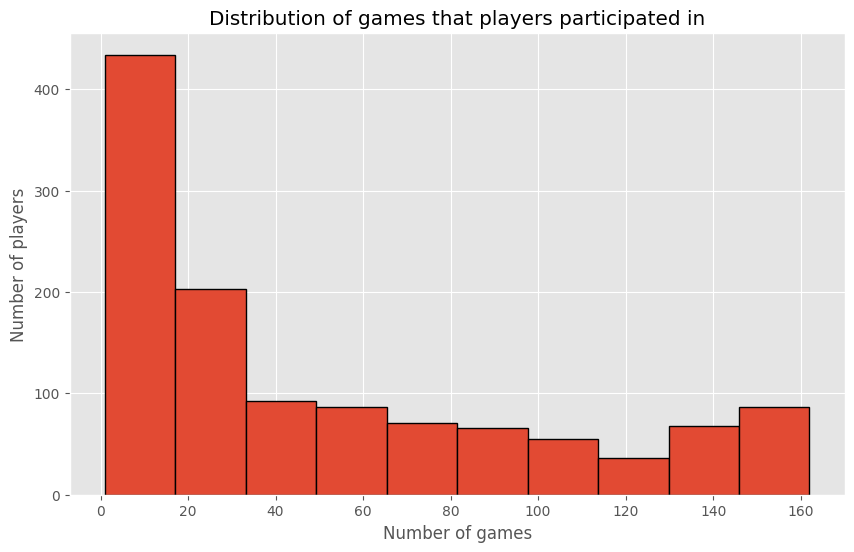

In [119]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(dt_baseball["game"], edgecolor="black", linewidth=1.0);
ax.set_xlabel("Number of games")
ax.set_ylabel("Number of players")
ax.set_title("Distribution of games that players participated in");

Next, the distribution of home runs was analyzed. The first graph below shows that few players stood out with high home run numbers. Furthermore, after analyzing the proportion of game participation and home runs, the same conclusion is reached.

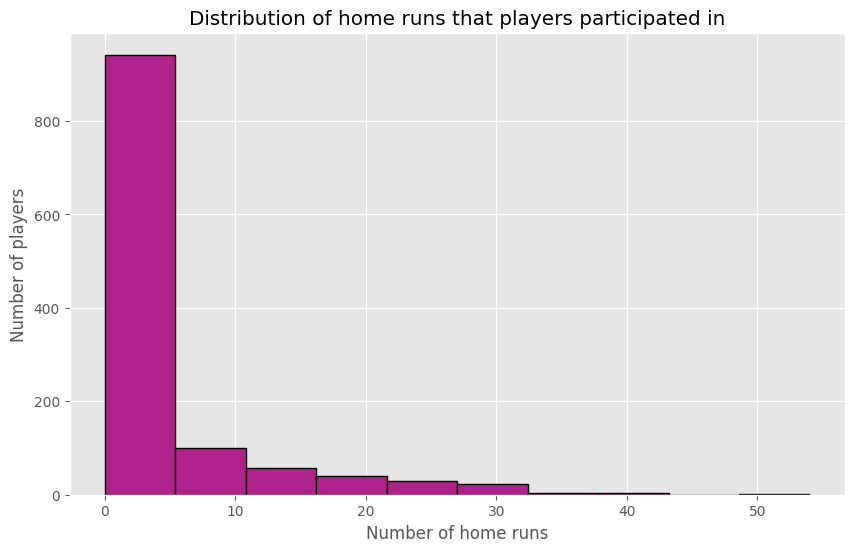

In [120]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))


ax.hist(dt_baseball["home_run"], edgecolor="black", linewidth=1.0, color="#B0228C");
ax.set_xlabel("Number of home runs")
ax.set_ylabel("Number of players")
ax.set_title("Distribution of home runs that players participated in");


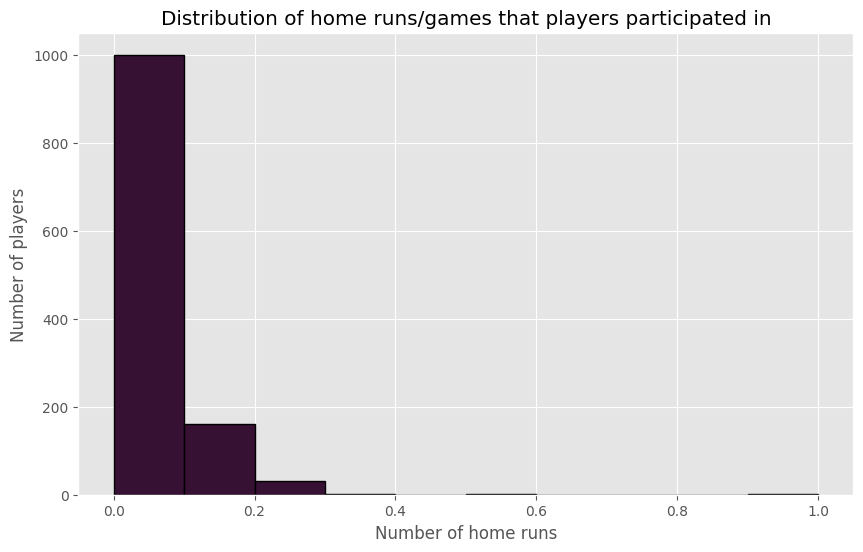

In [121]:
plt.style.use('ggplot')
dt_baseball["home_per_game"] = dt_baseball["home_run"] / dt_baseball["game"]
fig, ax = plt.subplots(figsize=(10, 6))


ax.hist(dt_baseball["home_per_game"], edgecolor="black", linewidth=1.0, color="#361134");
ax.set_xlabel("Number of home runs")
ax.set_ylabel("Number of players")
ax.set_title("Distribution of home runs/games that players participated in");

The boxplots below compare the distribution of the variables **strike_out**, **total_base**, **home_run**, **rbi**, **run**, and **hit**. In all the boxplots, we can see that the medians have low values, meaning that most of the players' statistics regarding these variables are low. Therefore, few players stand out, and the distributions are asymmetric.

Regarding the **strike_out** column, the median is one of the largest among all the boxplots, which means that players generally make a lot of mistakes. The large number of outliers also suggests that several players have strikeouts. Regarding variance, the box is not very wide, so we can't assume much information.

The **rbi** and **run** columns have similar boxplots. In both, the large number of outliers indicates that some players excelled more than others, whether in driving runs or scoring a lot. The boxplots show a consistent distribution among the values, although because the median is closer to the first quartile, this indicates that most players are statistically underperforming.

The long distribution of **total_base** indicates that there is a significant difference between the most stable players and those who have little progress. Furthermore, the low median and the presence of many outliers confirms that in general the offensive power of the group of players is low, dependent on the star players.

The data related to **hit** are consistent, however, with the median very close to the first quartile and with outliers standing out again, it is confirmed that most players do not usually hit the ball very successfully, and the best players have a significant role in statistics such as hitting average.

The distribution shown in **home_run** with a small, skewed box is common, as most players are expected to hit few home runs. However, the outliers confirm that some players stood out during the season.

Finally, considering that most boxplots present boxes with medians close to Q1 and a large number of outliers, it can be concluded that the distribution of the data is asymmetric and that it depends on the best players, while there is a relatively high number of players with more modest statistics.

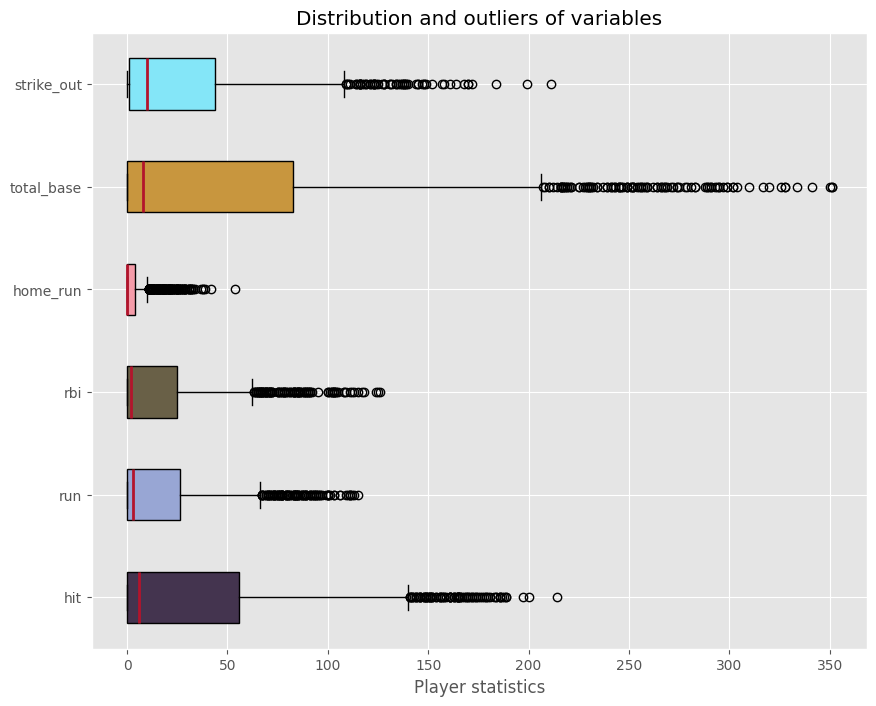

In [122]:
fig, ax = plt.subplots(figsize=(10, 8))
medianprops = dict(linewidth=2, color="#B3142C")
graph2 = ax.boxplot(dt_baseball[['hit', 'run', 'rbi', 'home_run', 
                                 'total_base', 'strike_out']], 
                    patch_artist=True, 
                    tick_labels=["hit", "run", "rbi", "home_run",
                                 "total_base", "strike_out"],
                    medianprops=medianprops,
                    vert=False);
ax.set_xlabel("Player statistics")

colors = ["#44344F", "#98A6D4", "#696047", "#F59CA9", "#C8963E", "#84E6F8"]
for patch, color in zip(graph2["boxes"], colors):
    patch.set_facecolor(color)

ax.set_title("Distribution and outliers of variables");

What positions are the ones that hit the most home runs?

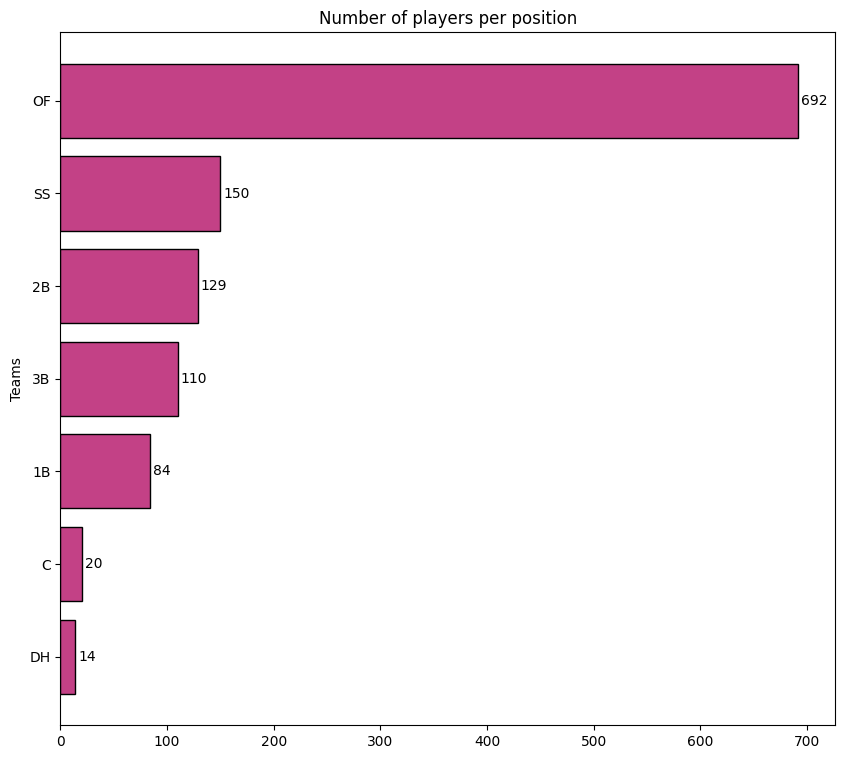

In [15]:
positions_quant = dt_baseball.loc[dt_baseball["hit"]]["position"].value_counts()

fig, ax = plt.subplots(figsize=(10, 9))

positions_quant = ax.barh(list(positions_quant.keys()), list(positions_quant.values),
                     edgecolor="black", linewidth=1.0, color="#C34186")
ax.bar_label(positions_quant, label_type="edge", padding=2)
ax.invert_yaxis()

ax.set_title("Number of players per position", color="black", fontsize=12)
ax.set_ylabel("Teams", color="black")
plt.show()

What was the average number of games that the league's players played?

In [16]:
float(dt_baseball.game.mean())

50.534612176814015

Which teams have the most players? And which teams have the fewest players in this database?

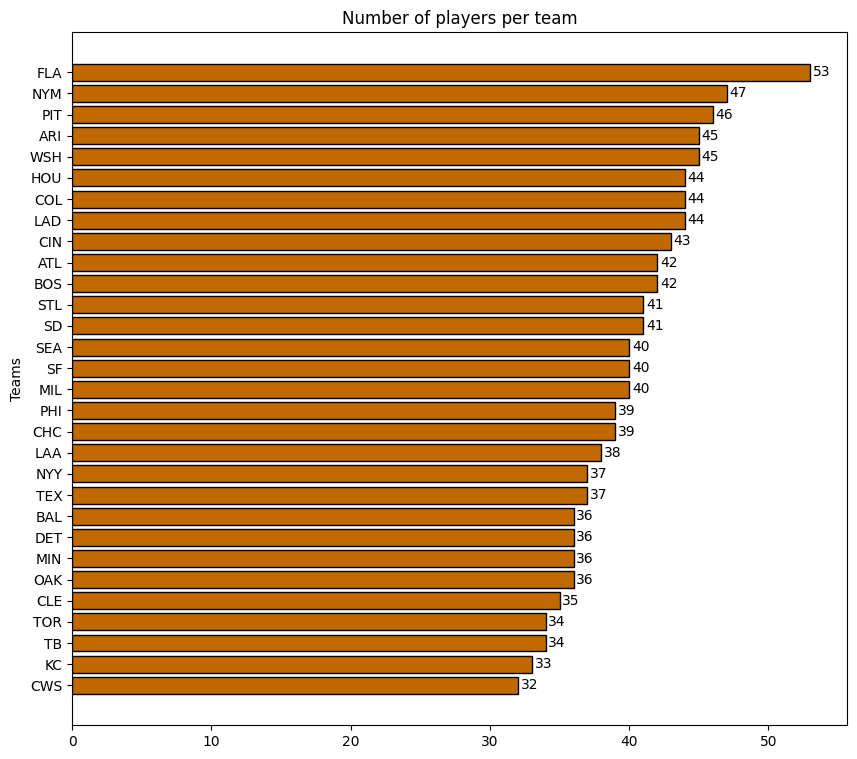

In [17]:
teams_players_quant = dt_baseball.team.value_counts()

fig, ax = plt.subplots(figsize=(10, 9))

graph_teams_quant = ax.barh(list(teams_players_quant.keys()), list(teams_players_quant.values),
                     edgecolor="black", linewidth=1.0, color="#BF6900")
ax.bar_label(graph_teams_quant, label_type="edge", padding=2)
ax.invert_yaxis()

ax.set_title("Number of players per team", color="black", fontsize=12)
ax.set_ylabel("Teams", color="black")
plt.show()

Strike outs are statistics that reveal the pitcher's dominance and the batsman's incompetence, so let's analyze the players who have the most strike outs and are in the pitcher position.

In [18]:
dt_baseball.loc[dt_baseball["position"]=="P"][["name", "strike_out"]].sort_values(by="strike_out", ascending=False)

,name,strike_out
449,R Halladay,42
487,R Lopez,35
483,M Cain,33
525,P Maholm,31
479,B Arroyo,31
...,...,...
1191,R Williams,0
1192,K Wood,0
1193,T Wood,0
1194,B Wood,0


Stolen base is one of the important defensive plays, let's check which players have the highest number of stolen bases

In [20]:
dt_baseball.loc[dt_baseball["stolen_base"]][["name", "stolen_base"]].sort_values(by="stolen_base", ascending=False)

,name,stolen_base
3,J Pierre,68
3,J Pierre,68
3,J Pierre,68
3,J Pierre,68
3,J Pierre,68
...,...,...
28,A Gonzalez,0
20,M Teixeira,0
24,B Butler,0
20,M Teixeira,0


What positions had the fewest home runs?

In [21]:
dt_baseball.groupby('position').home_run.count().sort_values()

position
-       8
DH     25
1B     69
3B     71
SS     71
2B     72
C     113
OF    226
P     544
Name: home_run, dtype: int64

How many home runs did each team hit?

In [22]:
dt_baseball.groupby('team').home_run.count()

team
ARI    45
ATL    42
BAL    36
BOS    42
CHC    39
CIN    43
CLE    35
COL    44
CWS    32
DET    36
FLA    53
HOU    44
KC     33
LAA    38
LAD    44
MIL    40
MIN    36
NYM    47
NYY    37
OAK    36
PHI    39
PIT    46
SD     41
SEA    40
SF     40
STL    41
TB     34
TEX    37
TOR    34
WSH    45
Name: home_run, dtype: int64

Which player had the most home runs?



In [23]:
dt_baseball.loc[(dt_baseball.home_run.idxmax()), 'name']

'J Bautista'

Who had the most home runs on each team?

In [24]:
dt_baseball.loc[(dt_baseball.groupby('team').home_run.idxmax()), ('name', 'home_run', 'team')].sort_values(by='home_run')

,name,home_run,team
68,Y Betancourt,16,KC
71,K Kouzmanoff,16,OAK
27,G Jones,21,PIT
120,B McCann,21,ATL
73,S Choo,22,CLE
185,R Branyan,25,SEA
13,H Pence,25,HOU
133,A Ramirez,25,CHC
262,J Thome,25,MIN
138,M Napoli,26,LAA


I want to know which player on each team had the most strike outs

In [25]:
dt_baseball.loc[dt_baseball.groupby("team")["strike_out"].idxmax()]

,name,team,position,game,at_bat,run,hit,double,triple,home_run,...,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg,home_per_game,rbi_per_game,strike_out_per_bat
110,M Reynolds,ARI,3B,145,499,79,99,17,2,32,...,83,211,7,4,0.320,0.433,0.198,0.220690,0.586207,0.422846
77,D Lee,ATL,1B,148,547,80,142,35,0,19,...,73,134,1,3,0.347,0.428,0.260,0.128378,0.540541,0.244973
42,A Jones,BAL,OF,149,581,76,165,25,5,19,...,23,119,7,7,0.325,0.442,0.284,0.127517,0.463087,0.204819
97,D Ortiz,BOS,DH,145,518,86,140,36,1,32,...,82,145,0,1,0.370,0.529,0.270,0.220690,0.703448,0.279923
112,A Soriano,CHC,OF,147,496,67,128,40,3,24,...,45,123,5,1,0.322,0.496,0.258,0.163265,0.537415,0.247984
101,D Stubbs,CIN,OF,150,514,91,131,19,6,22,...,55,168,30,6,0.329,0.444,0.255,0.146667,0.513333,0.326848
73,S Choo,CLE,OF,144,550,81,165,31,2,22,...,83,118,22,7,0.401,0.484,0.300,0.152778,0.625000,0.214545
34,C Gonzalez,COL,OF,145,587,111,197,34,9,34,...,40,135,26,8,0.376,0.598,0.336,0.234483,0.806897,0.229983
76,P Konerko,CWS,1B,149,548,89,171,30,1,39,...,72,110,0,1,0.393,0.584,0.312,0.261745,0.744966,0.200730
11,A Jackson,DET,OF,151,618,103,181,34,10,4,...,47,170,27,6,0.345,0.400,0.293,0.026490,0.271523,0.275081


**Descriptive statistics of the features**

In [26]:
#numeric variables
dt_baseball.describe()

,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg,home_per_game,rbi_per_game,strike_out_per_bat
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,970.000000
mean,50.534612,137.909091,17.771476,35.491243,7.077565,0.722269,3.847373,16.920767,55.555463,13.159299,28.612177,2.46789,0.941618,0.205531,0.237613,0.159374,0.040979,0.191135,0.306559
std,49.544371,188.126913,27.051262,51.908498,10.812941,1.601990,7.372345,26.636637,83.717936,20.737459,38.441364,6.48013,2.161646,0.173192,0.236077,0.144587,0.069254,0.218384,0.230822
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170847
50%,31.000000,37.000000,3.000000,6.000000,1.000000,0.000000,0.000000,2.000000,8.000000,2.000000,10.000000,0.00000,0.000000,0.255000,0.273000,0.195000,0.000000,0.117647,0.243117
75%,84.000000,225.000000,26.500000,56.000000,11.000000,1.000000,4.000000,25.000000,82.500000,20.000000,44.000000,1.00000,1.000000,0.324000,0.394000,0.259000,0.066987,0.333333,0.357942
max,162.000000,680.000000,115.000000,214.000000,49.000000,14.000000,54.000000,126.000000,351.000000,114.000000,211.000000,68.00000,18.000000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000


The first detail observed is that all columns except **strike_out_per_bar** have 1199 elements. When investigating the possible reason for the missing values ​​in this column, I noticed that these values ​​were NaN. Therefore, I checked if it could be due to the presence of 0 values ​​in the **at_bat** column, which, when dividing strike_out/at_bat, would result in NaN, since division by 0 is undefined.

This hypothesis proved to be correct, as evidenced by the results of the code below.

In [27]:
at_bat_zero = (dt_baseball["at_bat"] == 0).sum()
strike_bats_na = (dt_baseball["strike_out_per_bat"].isna()).sum()

print(f"The number of zero values ​​in the at_bat column is: {at_bat_zero}")

print(f"The number of results from dividing strike_out/at_bat that resulted in NaN were: {strike_bats_na}")

The number of zero values ​​in the at_bat column is: 229
The number of results from dividing strike_out/at_bat that resulted in NaN were: 229


Regarding the average features, each one was used to find the players who stand out the most, whether in relation to all players, players on the same team, or the player's position. All the conclusions of this analysis are in the **General Player Analysis** section of this notebook.

In [28]:
#categorical variables
dt_baseball.describe(include='object')

,name,team,position
count,1199,1199,1199
unique,1120,30,9
top,A Gonzalez,FLA,P
freq,4,53,544


### General Player Analysis

The 12 players with the most game appearances are:

In [29]:
dt_baseball.loc[dt_baseball["game"].sort_values(ascending=False).head(12).index]

,name,team,position,game,at_bat,run,hit,double,triple,home_run,...,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg,home_per_game,rbi_per_game,strike_out_per_bat
19,M Kemp,LAD,OF,162,602,82,150,25,6,28,...,53,170,19,15,0.310,0.450,0.249,0.172840,0.549383,0.282392
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,...,45,86,42,9,0.359,0.394,0.315,0.037037,0.265432,0.126471
18,C Figgins,SEA,2B,161,602,62,156,21,2,1,...,74,114,42,15,0.340,0.306,0.259,0.006211,0.217391,0.189369
53,J Bautista,TOR,OF,161,569,109,148,35,3,54,...,100,116,9,2,0.378,0.617,0.260,0.335404,0.770186,0.203866
46,P Fielder,MIL,1B,161,578,94,151,25,0,32,...,114,138,1,0,0.401,0.471,0.261,0.198758,0.515528,0.238754
33,J Loney,LAD,1B,161,588,67,157,41,2,10,...,52,95,10,5,0.329,0.395,0.267,0.062112,0.546584,0.161565
14,C Headley,SD,3B,161,610,77,161,29,3,11,...,56,139,17,5,0.327,0.375,0.264,0.068323,0.360248,0.227869
8,R Cano,NYY,2B,160,626,103,200,41,3,29,...,57,77,3,2,0.381,0.534,0.319,0.181250,0.681250,0.123003
28,A Gonzalez,SD,1B,160,591,87,176,33,0,31,...,93,114,0,0,0.393,0.511,0.298,0.193750,0.631250,0.192893
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,...,76,184,11,4,0.366,0.464,0.269,0.181250,0.518750,0.282642


Analyzing **above-average** players across all features:

In [30]:
def mean_analysis(feature, database):
    mean = round(float(database[feature].mean()), 2)
    above_mean = database[database[feature] >= mean]
    below_mean = database[database[feature] < mean]

    rows = database.loc[-database[feature].isna()].shape[0]

    percent_above = round((above_mean.shape[0]/rows) * 100, 2)
    percent_below = round((below_mean.shape[0]/rows) * 100, 2)

    return above_mean, below_mean, percent_above, percent_below,

above_games, below_games, percent_above_games, percent_below_games = mean_analysis("game", dt_baseball)

print(f"Regarding the number of games each player played, {percent_above_games}% had above-average numbers and " 
      f"{percent_below_games}% had below-average participation in the season's games.")



Regarding the number of games each player played, 38.78% had above-average numbers and 61.22% had below-average participation in the season's games.


In [31]:
above_bat, below_bat, percent_above_bat, percent_below_bat = mean_analysis("at_bat", dt_baseball)

print(f"Regarding the number of times the players had time at bat, {percent_above_bat}% had above-average numbers and "
      f"{percent_below_bat}% had below-average participations at bat.")


Regarding the number of times the players had time at bat, 32.69% had above-average numbers and 67.31% had below-average participations at bat.


In [32]:
above_run, below_run, percent_above_run, percent_below_run = mean_analysis("run", dt_baseball)

print(f"Regarding runs of each player, {percent_above_run}% had above-average numbers and "
      f"{percent_below_run}% had below-average runs.")

Regarding runs of each player, 30.69% had above-average numbers and 69.31% had below-average runs.


In [33]:
above_hit, below_hit, percent_above_hit, percent_below_hit = mean_analysis("hit", dt_baseball)

print(f"Regarding hits of each player, {percent_above_hit}% had above-average numbers and "
      f"{percent_below_hit}% had below-average hits.")

Regarding hits of each player, 31.44% had above-average numbers and 68.56% had below-average hits.


In [34]:
above_double, below_double, percent_above_double, percent_below_double = mean_analysis("double", dt_baseball)

print(f"Regarding doubles of each player, {percent_above_double}% had above-average numbers and "
      f"{percent_below_double}% had below-average doubles.")

Regarding doubles of each player, 29.77% had above-average numbers and 70.23% had below-average doubles.


In [35]:
above_triple, below_triple, percent_above_triple, percent_below_triple = mean_analysis("triple", dt_baseball)

print(f"Regarding triples of each player, {percent_above_triple}% had above-average numbers and "
      f"{percent_below_triple}% had below-average triples.")


Regarding triples of each player, 28.27% had above-average numbers and 71.73% had below-average triples.


In [36]:
above_homerun, below_homerun, percent_above_homerun, percent_below_homerun = mean_analysis("home_run", dt_baseball)

print(f"Regarding home runs made by each player, {percent_above_homerun}% had above-average numbers and "
      f"{percent_below_homerun}% had numbers below-average.")

Regarding home runs made by each player, 26.94% had above-average numbers and 73.06% had numbers below-average.


In [37]:
above_rbi, below_rbi, percent_above_rbi, percent_below_rbi = mean_analysis("rbi", dt_baseball)

print(f"Regarding rbi by each player, {percent_above_rbi}% had above-average numbers and "
      f"{percent_below_rbi}% had numbers below-average.")

Regarding rbi by each player, 30.19% had above-average numbers and 69.81% had numbers below-average.


In [38]:
above_totalbase, below_totalbase, percent_above_totalbase, percent_below_totalbase = mean_analysis("total_base", dt_baseball)

print(f"Regarding bases the players gained with hits, {percent_above_totalbase}% had above-average numbers and "
      f"{percent_below_totalbase}% had numbers below-average.")

Regarding bases the players gained with hits, 30.78% had above-average numbers and 69.22% had numbers below-average.


In [39]:
above_walk, below_walk, percent_above_walk, percent_below_walk = mean_analysis("walk", dt_baseball)

print(f"Regarding walks by each player, {percent_above_walk}% had above-average numbers and "
      f"{percent_below_walk}% had numbers below-average.")

Regarding walks by each player, 29.86% had above-average numbers and 70.14% had numbers below-average.


In [40]:
above_strikes, below_strikes, percent_above_strikes, percent_below_strikes = mean_analysis("strike_out", dt_baseball)

print(f"Regarding strikes out by each player, {percent_above_strikes}% had above-average numbers and "
      f"{percent_below_strikes}% had numbers below-average.")

Regarding strikes out by each player, 33.11% had above-average numbers and 66.89% had numbers below-average.


In [41]:
above_stolenbase, below_stolenbase, percent_above_stolenbase, percent_below_stolenbase = mean_analysis("stolen_base", dt_baseball)

print(f"Regarding stolen bases by each player, {percent_above_stolenbase}% had above-average numbers and "
      f"{percent_below_stolenbase}% had numbers below-average.")

Regarding stolen bases by each player, 20.18% had above-average numbers and 79.82% had numbers below-average.


In [42]:
above_stealing, below_stealing, percent_above_stealing, percent_below_stealing = mean_analysis("caught_stealing", dt_baseball)

print(f"Regarding when each player was caught stealing, {percent_above_stealing}% had above-average numbers and "
      f"{percent_below_stealing}% had numbers below-average.")

Regarding when each player was caught stealing, 29.77% had above-average numbers and 70.23% had numbers below-average.


In [43]:
above_obp, below_obp, percent_above_obp, percent_below_obp = mean_analysis("obp", dt_baseball)

print(f"Regarding ob base percentage by each player, {percent_above_obp}% had above-average numbers and "
      f"{percent_below_obp}% had numbers below-average.")

Regarding ob base percentage by each player, 56.46% had above-average numbers and 43.54% had numbers below-average.


In [44]:
above_slg, below_slg, percent_above_slg, percent_below_slg = mean_analysis("slg", dt_baseball)

print(f"Regarding slugging percentage by each player, {percent_above_slg}% had above-average numbers and "
      f"{percent_below_slg}% had numbers below-average.")

Regarding slugging percentage by each player, 53.21% had above-average numbers and 46.79% had numbers below-average.


In [45]:
above_batavg, below_batavg, percent_above_batavg, percent_below_batavg = mean_analysis("bat_avg", dt_baseball)

print(f"Regarding each players hits by total at bats, {percent_above_batavg}% had above-average numbers and "
      f"{percent_below_batavg}% had numbers below-average.")

Regarding each players hits by total at bats, 55.88% had above-average numbers and 44.12% had numbers below-average.


In [46]:
above_hpg, below_hpg, percent_above_hpg, percent_below_hpg = mean_analysis("home_per_game", dt_baseball)

print(f"Regarding players home runs per game, {percent_above_hpg}% had above-average numbers and "
      f"{percent_below_hpg}% had numbers below-average.")

Regarding players home runs per game, 33.53% had above-average numbers and 66.47% had numbers below-average.


In [47]:
above_rpg, below_rpg, percent_above_rpg, percent_below_rpg = mean_analysis("rbi_per_game", dt_baseball)

print(f"Regarding players rbi per game, {percent_above_rpg}% had above-average numbers and "
      f"{percent_below_rpg}% had numbers below-average.")

Regarding players rbi per game, 43.12% had above-average numbers and 56.88% had numbers below-average.


In [48]:
above_spb, below_spb, percent_above_spb, percent_below_spb = mean_analysis("strike_out_per_bat", dt_baseball)

print(f"Regarding players strikes per bat, {percent_above_spb}% had above-average numbers and "
      f"{percent_below_spb}% had numbers below-average.")

Regarding players strikes per bat, 33.51% had above-average numbers and 66.49% had numbers below-average.


In [49]:
index_mean = dt_baseball.columns[3:]
column_mean = ["Above", "Below"]
dados_mean = [
    [percent_above_games, percent_below_games],
    [percent_above_bat, percent_below_bat],
    [percent_above_run, percent_below_run],
    [percent_above_hit, percent_below_hit],
    [percent_above_double, percent_below_double],
    [percent_above_triple, percent_below_triple],
    [percent_above_homerun, percent_below_homerun],
    [percent_above_rbi, percent_below_rbi],
    [percent_above_totalbase, percent_below_totalbase],
    [percent_above_walk, percent_below_walk],
    [percent_above_strikes, percent_below_strikes],
    [percent_above_stolenbase, percent_below_stolenbase],
    [percent_above_stealing, percent_below_stealing],
    [percent_above_obp, percent_below_obp],
    [percent_above_slg, percent_below_slg],
    [percent_above_batavg, percent_below_batavg],
    [percent_above_hpg, percent_below_hpg],
    [percent_above_rpg, percent_below_rpg],
    [percent_above_spb, percent_below_spb]
    
    
]
mean_dataframe = pd.DataFrame(dados_mean, columns=column_mean, index=index_mean)
mean_dataframe


,Above,Below
game,38.78,61.22
at_bat,32.69,67.31
run,30.69,69.31
hit,31.44,68.56
double,29.77,70.23
triple,28.27,71.73
home_run,26.94,73.06
rbi,30.19,69.81
total_base,30.78,69.22
walk,29.86,70.14


Based on the table above, it can be observed that only the features **obp**, **slg**, **rbi_per_game**, and **bat_avg** have more than 40% of players above average. It's important to highlight that all are proportional metrics, as they are based on the number of games each player participated in.

Therefore, it can be concluded that when metrics are not proportional, few players stand out, specifically the team stars or outliers in the dataset. But when normalized metrics are analyzed, more players show above-average performance. Thus, **players may not have very high numbers, but when they play, they prove to be efficient for the team.**

Another point to highlight are the features **strike_out**, **caught_stealing**, and **strike_out_per_bat**, in which about 33% of players are above average. Although this is a small number considering the overall context, it is good. Since these are features related to errors, the players below average, about 67%, are making few errors.

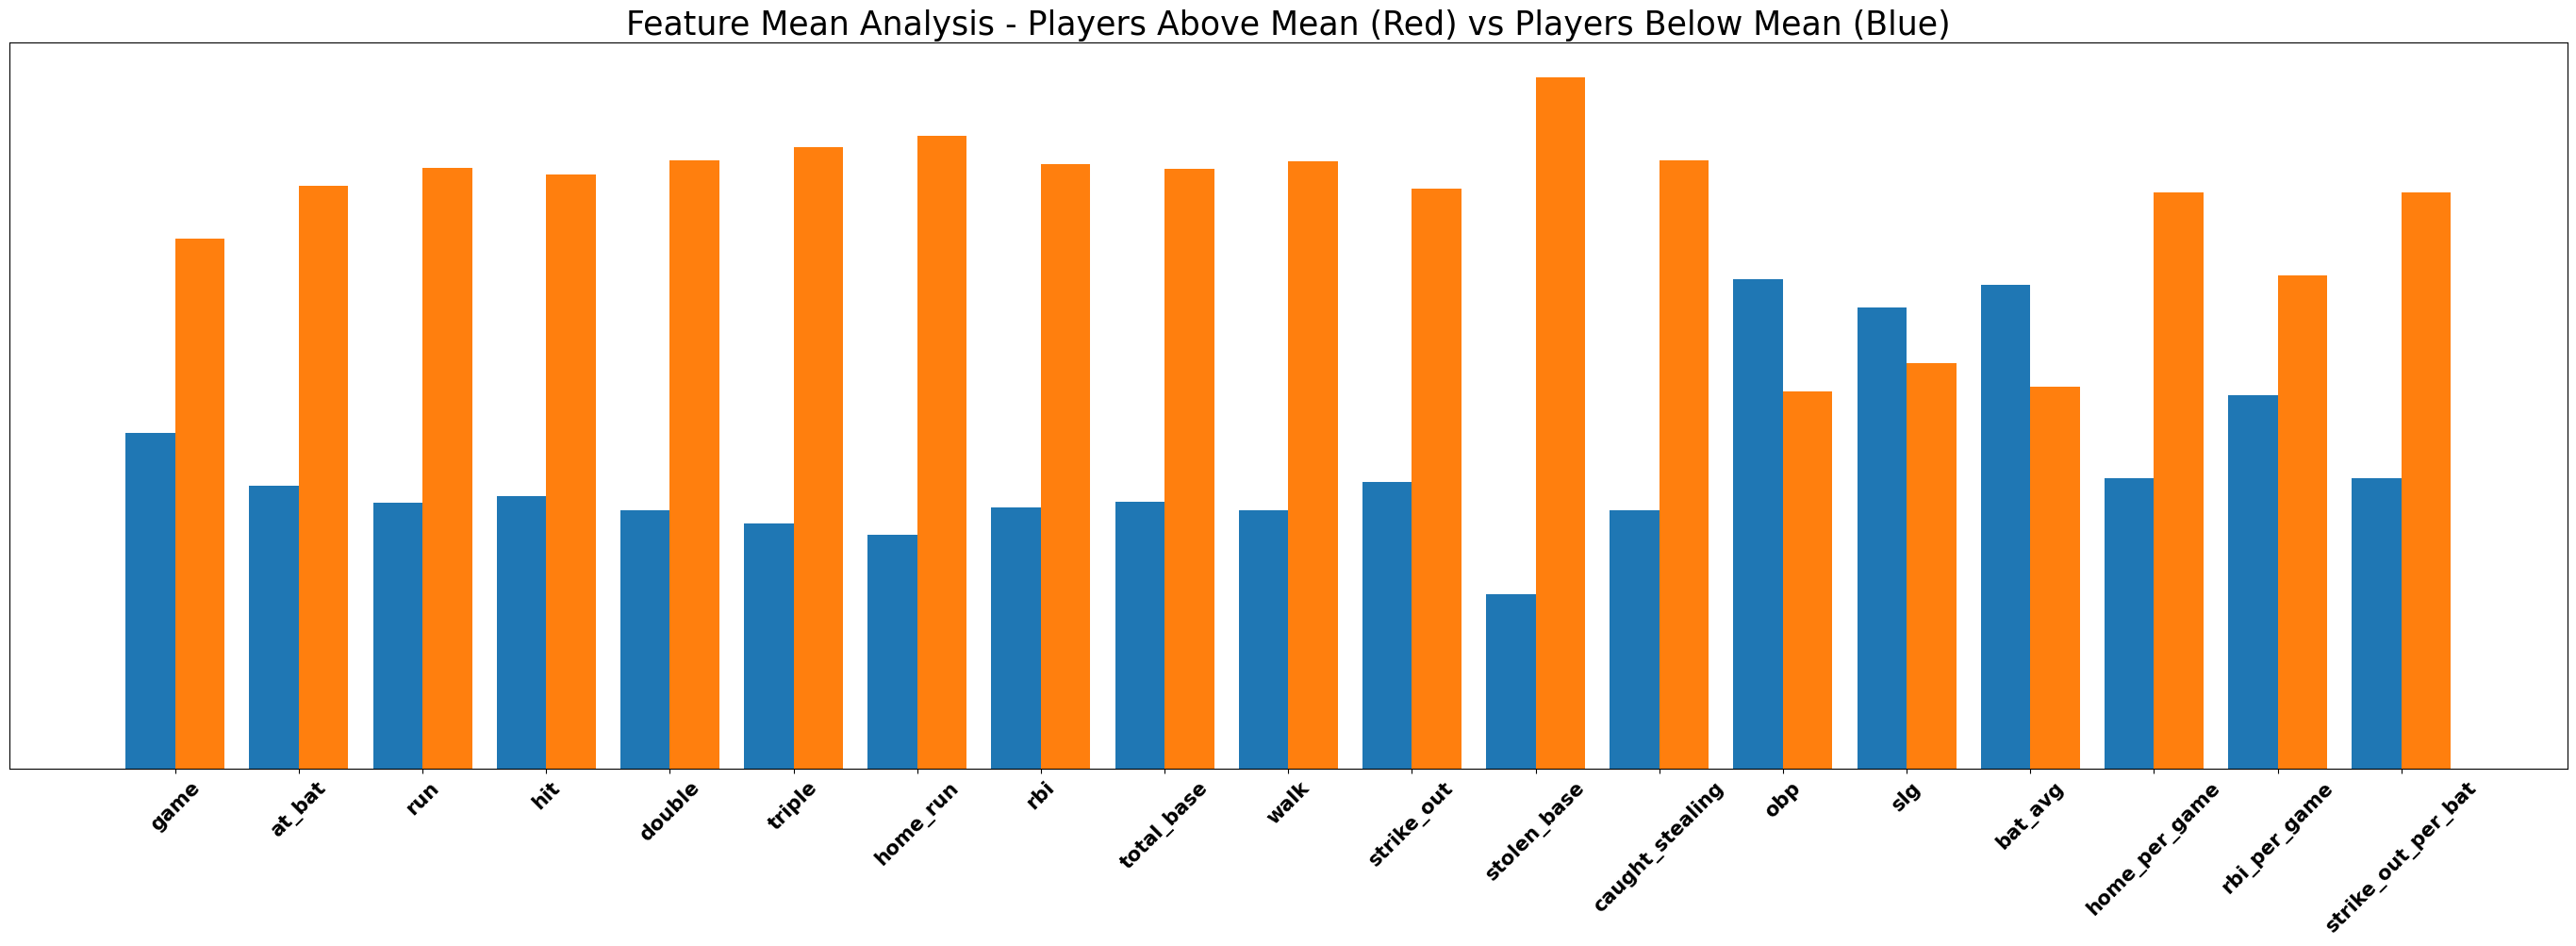

In [50]:
fig, ax = plt.subplots(figsize=(35, 10))
plt.style.use('ggplot')

x_labels = mean_dataframe.index
x = np.arange(len(x_labels))

ax.bar(x - 0.40/2, mean_dataframe["Above"].values, width=0.40)
ax.bar(x + 0.40/2, mean_dataframe["Below"].values, width=0.40)

ax.set_ylabel("")
ax.set_title("Feature Mean Analysis - Players Above Mean (Red) vs Players Below Mean (Blue)", fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=15, 
              color='black', 
              fontweight='bold',
              rotation=45)
ax.yaxis.set_visible(False)

output_folder = "graphs"
filename = "feature-mean-analysis"
full_path = os.path.join(output_folder, filename)
fig.savefig(full_path, dpi=600, bbox_inches="tight")
plt.show()

Analyzing **above-average** players across all teams:

In [51]:
def teams_mean_analysis(database):
    variables = database.columns[3:]
    best_players = {}
    worst_players = {}
    percents_below = {}
    percents_above = {}

    for variable in variables:
        above, below, percent_above, percent_below = mean_analysis(variable, database)
        best_players[variable] = above
        worst_players[variable] = below
        percents_below[variable] = percent_below
        percents_above[variable] = percent_above
    
    return best_players, worst_players, percents_above, percents_below


In [52]:
teams = dt_baseball["team"].unique()
team_dict= {}
for team in teams:
    teams_variables = {"best_players": [], "worst_players": [], "percents_above": [], "percents_below": []}
    teams_variables["best_players"], teams_variables["worst_players"], teams_variables["percents_above"], teams_variables["percents_below"] = teams_mean_analysis(dt_baseball.loc[dt_baseball["team"] == team])
    team_dict[team] = teams_variables
    

def best_players_teams(teams_dict, team):
    names_players = []
    for i in index_mean:
        names_players.append(teams_dict[team]["best_players"][i]["name"].values)

    best_players = []
    for i in range(0, len(names_players)-1):
        best_players = best_players + list(names_players[i])

    return list(set(best_players))

def best_players_teams_ids(teams_dict, team):
    ids_players = []
    for i in index_mean:
        ids_players.append(teams_dict[team]["best_players"][i].index)

    best_players = []
    for i in range(0, len(ids_players)-1):
        best_players = best_players + list(ids_players[i])

    return list(set(best_players))


percents_teams = []

Function to calculate player scores relative to the overall average:

In [53]:
from sklearn.preprocessing import MinMaxScaler

def scores(player):
    positive = ["run", "hit", "double", "triple", "home_run", "rbi", 
                "total_base", "walk", "stolen_base", "obp", "slg", "bat_avg",
                "home_per_game", "rbi_per_game"]
    negative = ["strike_out", "caught_stealing", "strike_out_per_bat"]
    scaler = MinMaxScaler()

    player[positive] = scaler.fit_transform(player[positive])
    player[negative] = 1 - scaler.fit_transform(player[negative])
    geral_score = player[player.columns[3:]].mean(axis=1).values

    return geral_score.item()

def players_score(indexs, team):
    players_score = {}
    for index in indexs:
        player_stats = dt_baseball.loc[(dt_baseball.index == index) & (dt_baseball["team"] == team)].copy()
        for stat in dt_baseball.columns[3:]:
            player_stats[stat] =  player_stats[stat].fillna(0) - dt_baseball[stat].mean()
        players_score[dt_baseball.iloc[index]["name"]] = round(scores(player_stats), 2)
        

    scores_players = dict(sorted(players_score.items(), key=lambda item: item[1], reverse=True))
    return scores_players


Function to generate graphs of players above or below average.

In [54]:
def graphs_above_below(team, best_worst):

    fig, ax = plt.subplots(figsize=(14, 10))
    y = np.arange(len(best_worst.index))

    above = ax.barh(y, best_worst["Above"].values, label="Above mean (%)")
    ax.bar_label(above, fmt=lambda x: f'{x}%',
                label_type="edge", padding=2)
    below = ax.barh(y, -best_worst["Below"].values, label="Below mean (%)")
    ax.bar_label(below, fmt=lambda x: f'{abs(float(x))}%',
                label_type="edge", padding=2)

    ax.set_yticks(y)
    ax.set_yticklabels(best_worst.index, color='black', 
                fontweight='bold');
    ax.invert_yaxis()
    ax.set_xlabel("Percentage (%)")
    ax.set_title(f"Percentage of players Above average (red) and Below average (blue) for {team}.")

    x_ticks = ax.get_xticks()
    ax.set_xticks(x_ticks)
    x_labels = [abs(x) for x in ax.get_xticks()];
    ax.set_xticklabels(x_labels, color='black', 
                fontweight='bold');

    ax.legend(loc="upper right");
    output_folder = f"graphs/teams/{team.lower()}"
    filename = f"{team.lower()}-athletics-mean"
    full_path = os.path.join(output_folder, filename)
    os.makedirs(output_folder, exist_ok=True)
    fig.savefig(full_path, dpi=600, bbox_inches="tight")
    plt.show()

In [55]:
def players_details(best_players, team):
    #best players scores dataframe  
    players = pd.DataFrame({"Players": players_score(best_players, team).keys(), 
                            "Score": players_score(best_players, team).values()})
    markdown = players.to_markdown(index=False)

    #scores for all the players
    all_players = players_score(dt_baseball.loc[dt_baseball["team"] == team].index, team)

    return players, markdown, all_players

**New York Yankees**

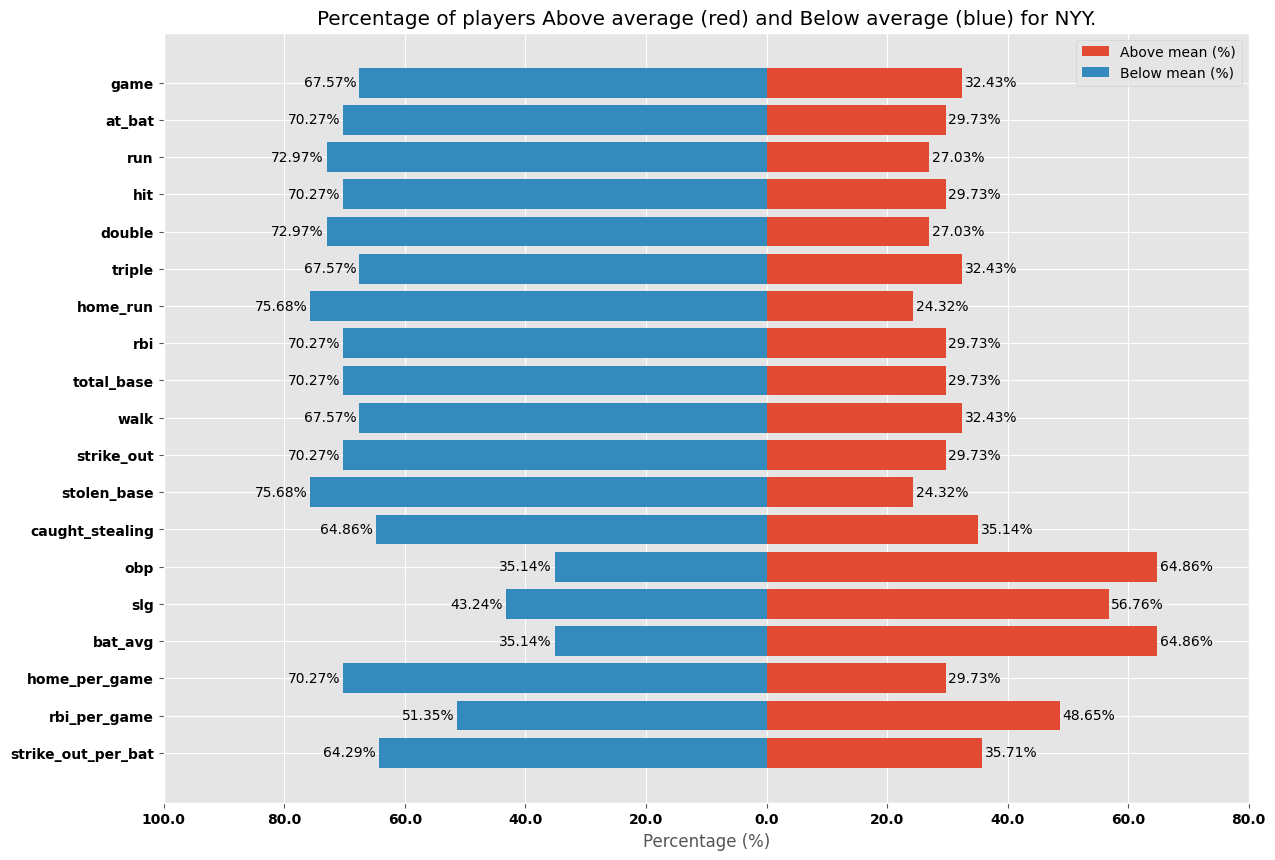

In [56]:
best_worst_nyy = pd.DataFrame({"Above": list(team_dict["NYY"]["percents_above"].values()),
                               "Below": list(team_dict["NYY"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])

graphs_above_below("NYY", best_worst_nyy)

In [57]:
best_players_nyy = best_players_teams_ids(team_dict, "NYY")
print(f"New York Yankees had {len(best_players_nyy)} above-average players in all features")

players_nyy, markdown_nyy, all_players_nyy = players_details(best_players_nyy, "NYY")


New York Yankees had 25 above-average players in all features


**Seattle Mariners**

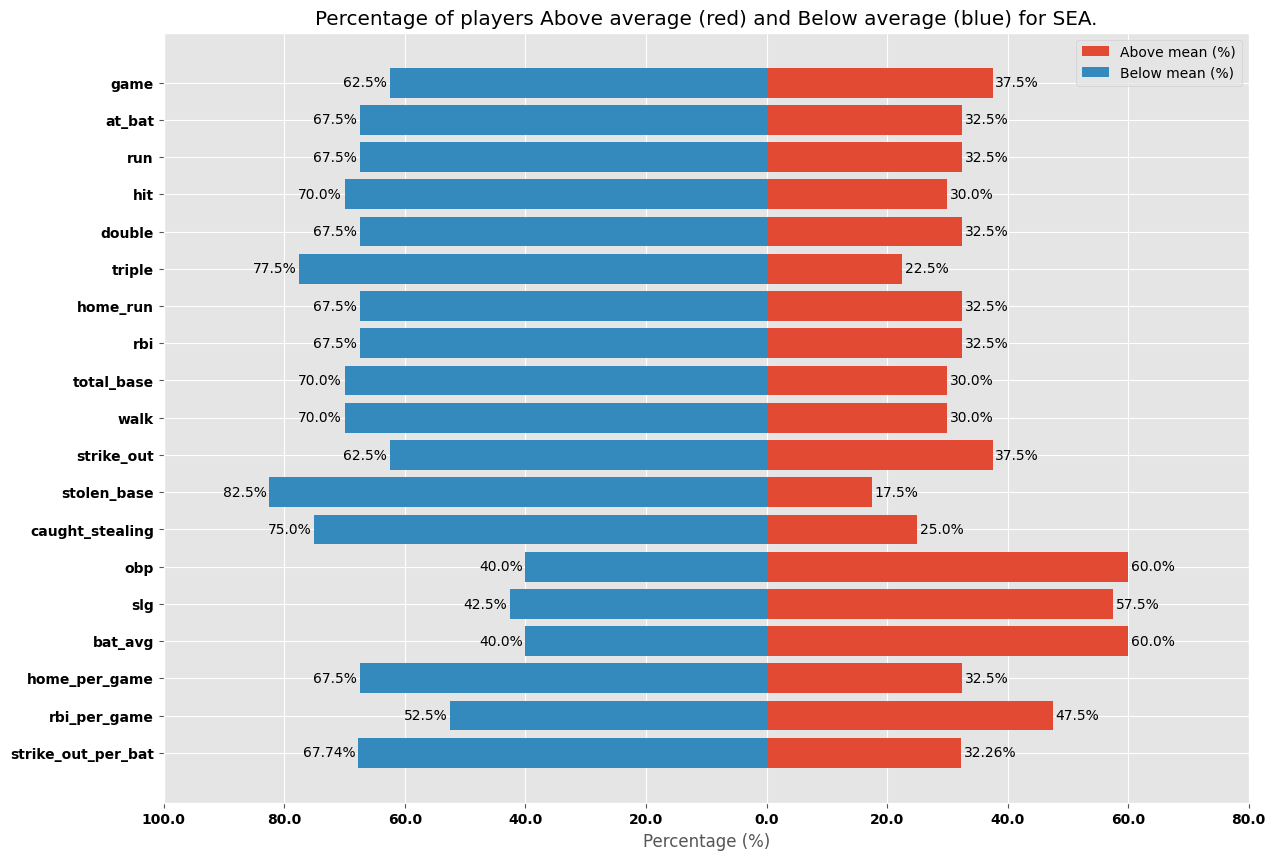

In [58]:
best_worst_sea = pd.DataFrame({"Above": list(team_dict["SEA"]["percents_above"].values()),
                               "Below": list(team_dict["SEA"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])

graphs_above_below("SEA", best_worst_sea)


In [59]:
best_players_sea = best_players_teams_ids(team_dict, "SEA")
print(f"Seattle Mariners had {len(best_players_sea)} above-average players in all features")

players_sea, markdown_sea, all_players_sea = players_details(best_players_sea, "SEA")

Seattle Mariners had 25 above-average players in all features


**Texas Rangers**

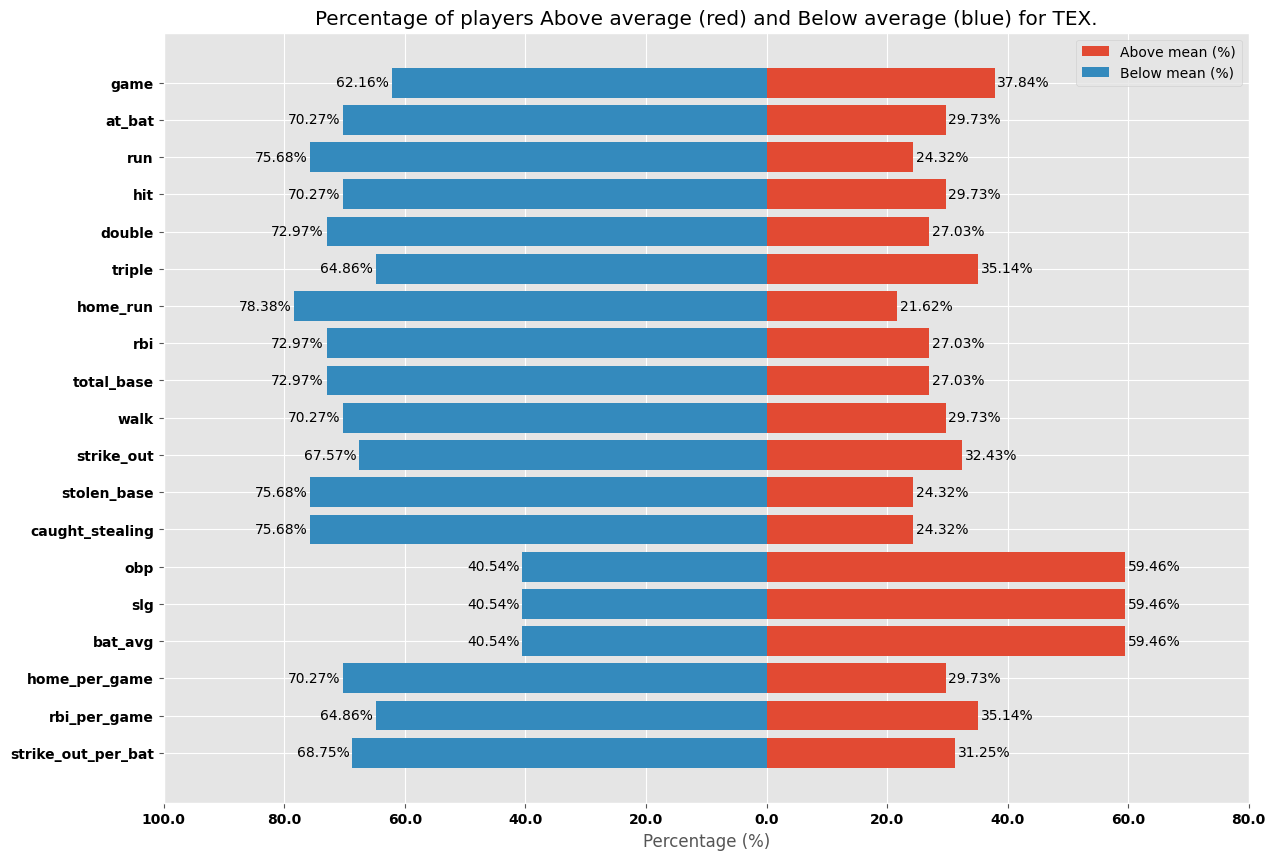

In [60]:
best_worst_tex = pd.DataFrame({"Above": list(team_dict["TEX"]["percents_above"].values()),
                               "Below": list(team_dict["TEX"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])

graphs_above_below("TEX", best_worst_tex)

In [61]:
best_players_tex = best_players_teams_ids(team_dict, "TEX")
print(f"Texas Rangers had {len(best_players_tex)} above-average players in all features")

players_tex, markdown_tex, all_players_tex = players_details(best_players_tex, "TEX")


Texas Rangers had 24 above-average players in all features


**Chicago White Sox**

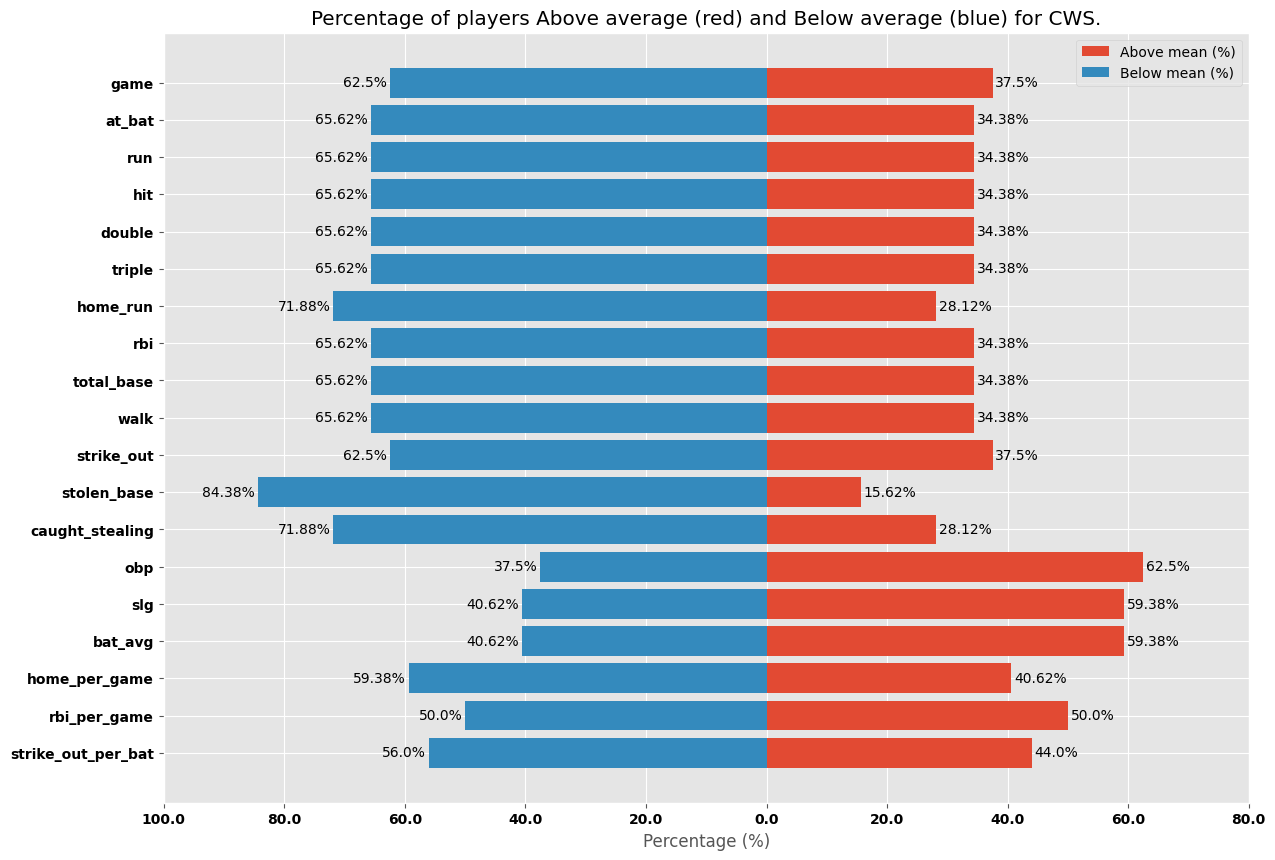

In [62]:
best_worst_cws = pd.DataFrame({"Above": list(team_dict["CWS"]["percents_above"].values()),
                               "Below": list(team_dict["CWS"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])

graphs_above_below("CWS", best_worst_cws)

In [63]:
best_players_cws = best_players_teams_ids(team_dict, "CWS")
print(f"Chicago White Sox had {len(best_players_cws)} above-average players in all features")

players_cws, markdown_cws, all_players_cws = players_details(best_players_cws, "CWS")


Chicago White Sox had 21 above-average players in all features


**Milwaukee Brewers**

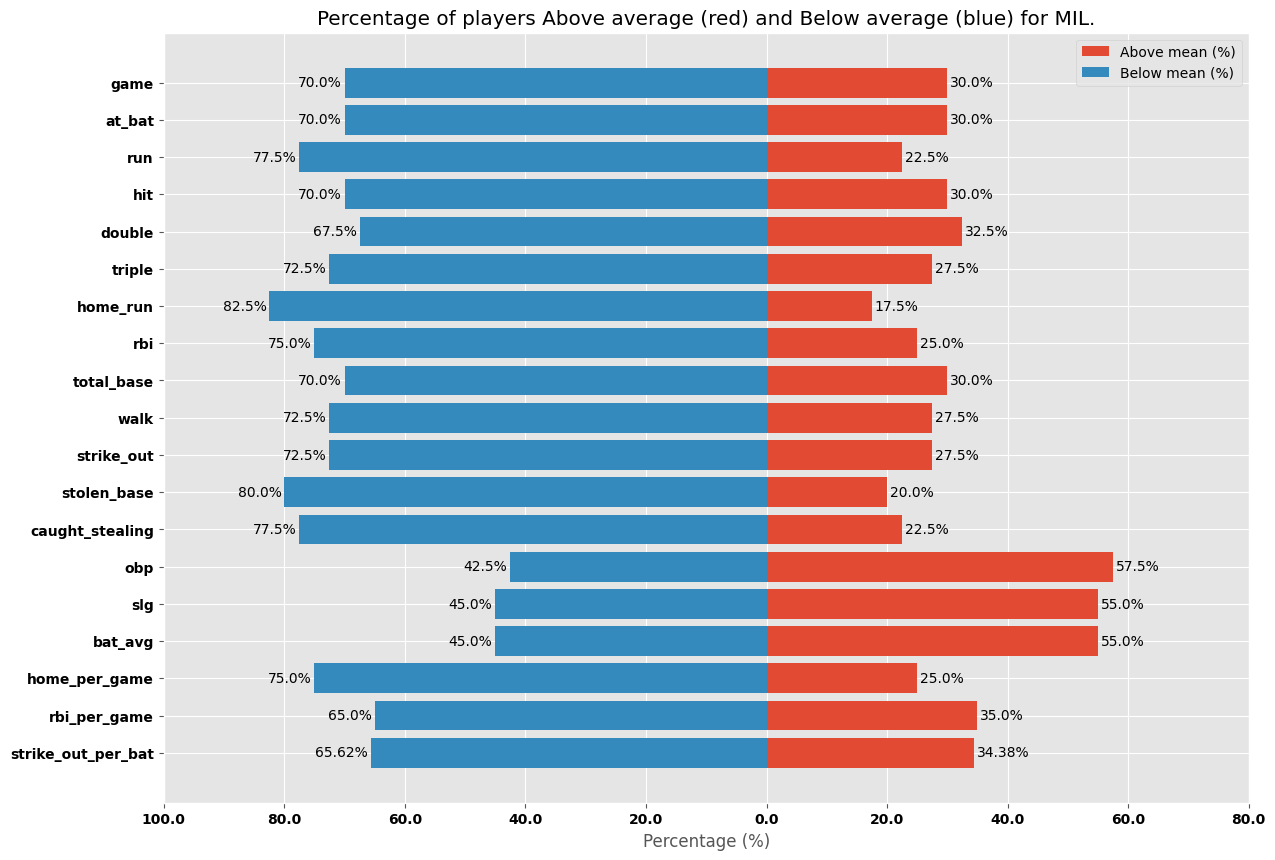

In [64]:
best_worst_mil = pd.DataFrame({"Above": list(team_dict["MIL"]["percents_above"].values()),
                               "Below": list(team_dict["MIL"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_mil)

graphs_above_below("MIL", best_worst_mil)

In [65]:
best_players_mil = best_players_teams_ids(team_dict, "MIL")
print(f"Milwaukee Brewers had {len(best_players_mil)} above-average players in all features")

players_mil, markdown_mil, all_players_mil = players_details(best_players_mil, "MIL")


Milwaukee Brewers had 24 above-average players in all features


**Boston Red Sox**

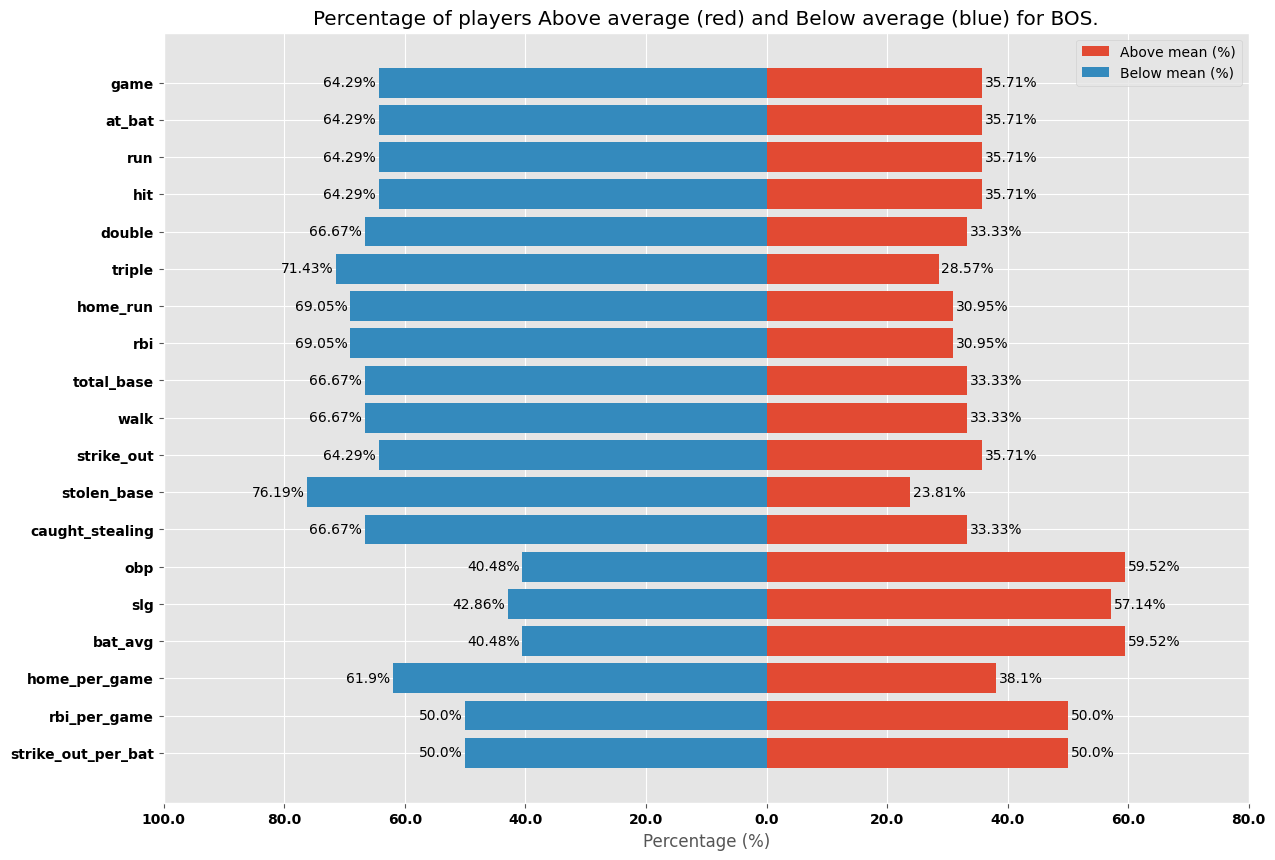

In [66]:
best_worst_bos = pd.DataFrame({"Above": list(team_dict["BOS"]["percents_above"].values()),
                               "Below": list(team_dict["BOS"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_bos)

graphs_above_below("BOS", best_worst_bos)

In [67]:
best_players_bos = best_players_teams_ids(team_dict, "BOS")
print(f"Boston Red Sox had {len(best_players_bos)} above-average players in all features")

players_bos, markdown_bos, all_players_bos = players_details(best_players_bos, "BOS")

Boston Red Sox had 28 above-average players in all features


**Baltimore Orioles**

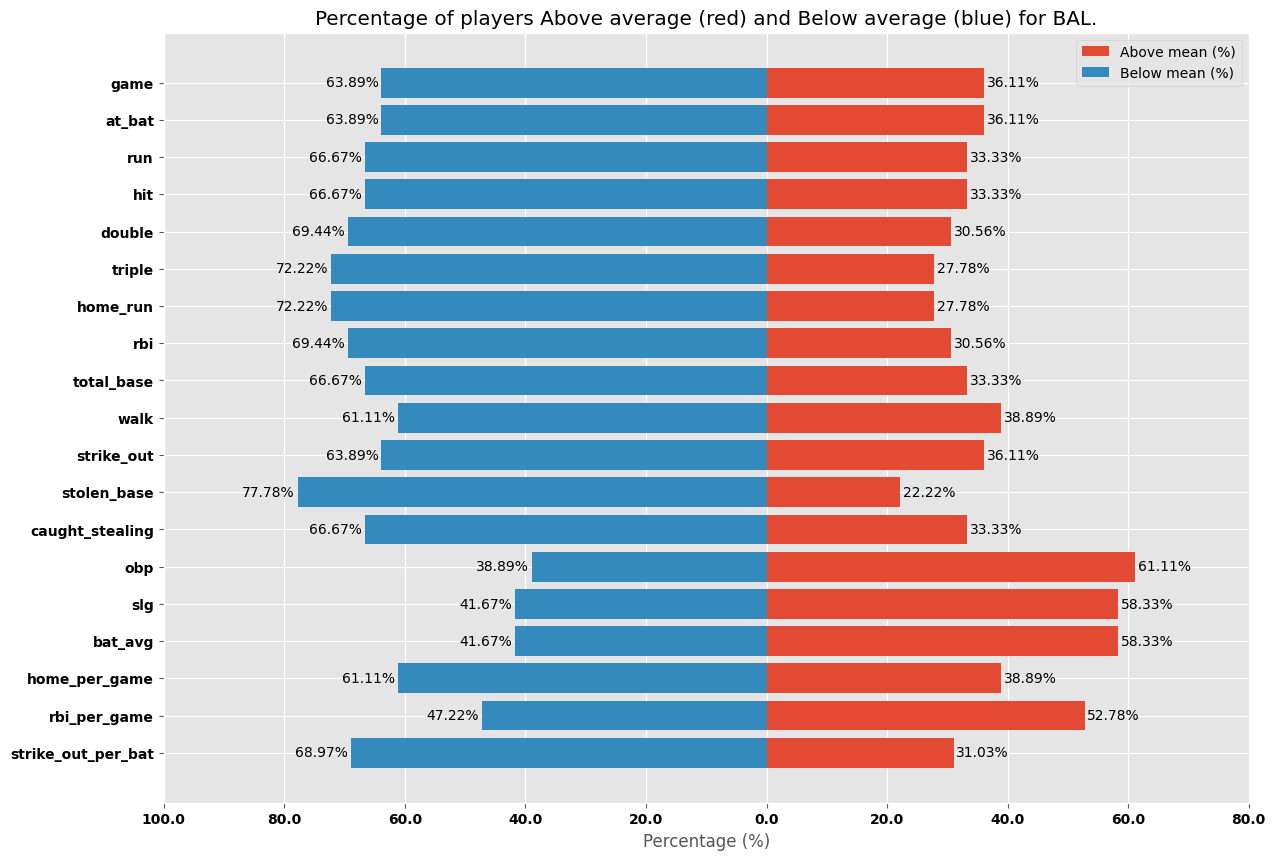

In [68]:
best_worst_bal = pd.DataFrame({"Above": list(team_dict["BAL"]["percents_above"].values()),
                               "Below": list(team_dict["BAL"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_bal)

graphs_above_below("BAL", best_worst_bal)

In [69]:
best_players_bal = best_players_teams_ids(team_dict, "BAL")
print(f"Baltimore Orioles had {len(best_players_bal)} above-average players in all features")

players_bal, markdown_bal, all_players_bal = players_details(best_players_bal, "BAL")


Baltimore Orioles had 22 above-average players in all features


**Minnesota Twins**

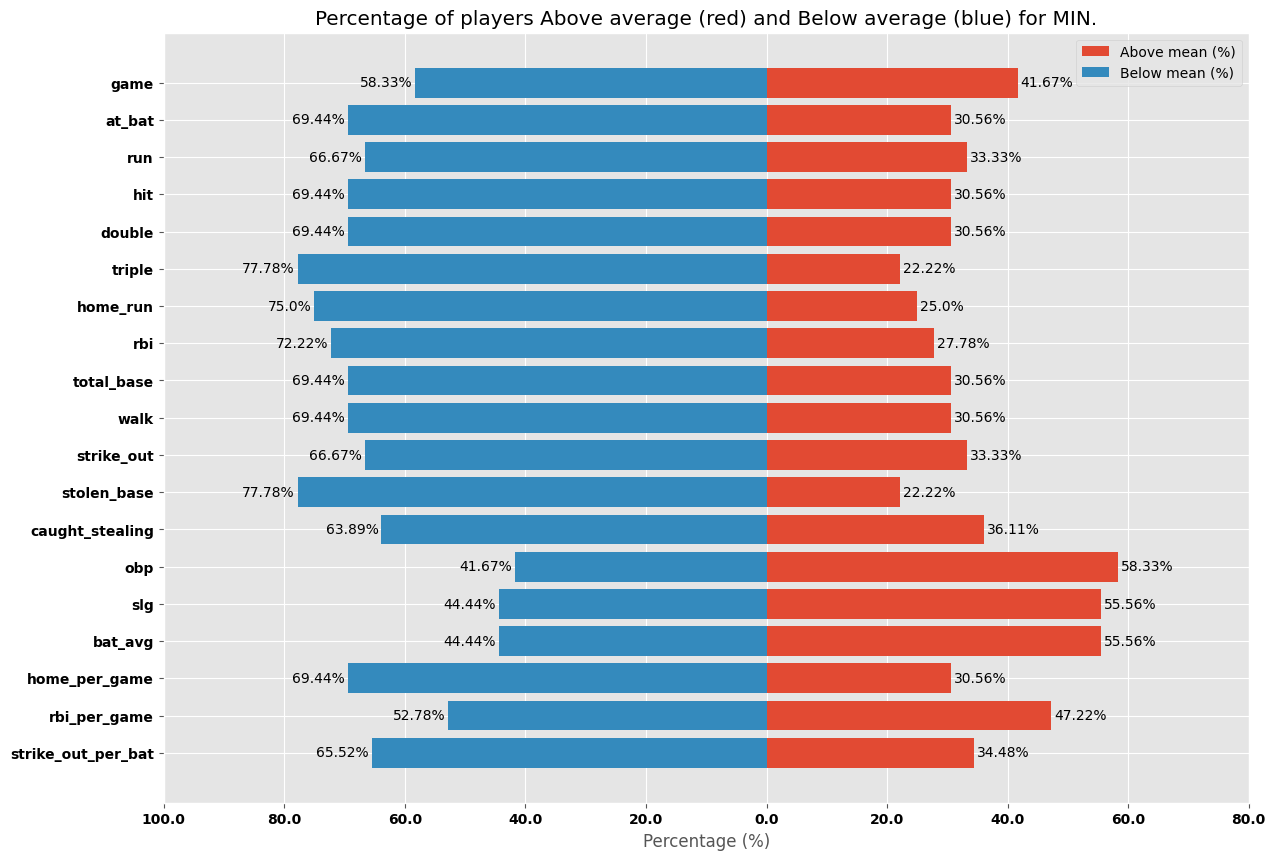

In [70]:
best_worst_min = pd.DataFrame({"Above": list(team_dict["MIN"]["percents_above"].values()),
                               "Below": list(team_dict["MIN"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_min)

graphs_above_below("MIN", best_worst_min)

In [71]:
best_players_min = best_players_teams_ids(team_dict, "MIN")
print(f"Minnesota Twins had {len(best_players_min)} above-average players in all features")

players_min, markdown_min, all_players_min = players_details(best_players_min, "MIN")

Minnesota Twins had 22 above-average players in all features


**Cincinnati Reds**

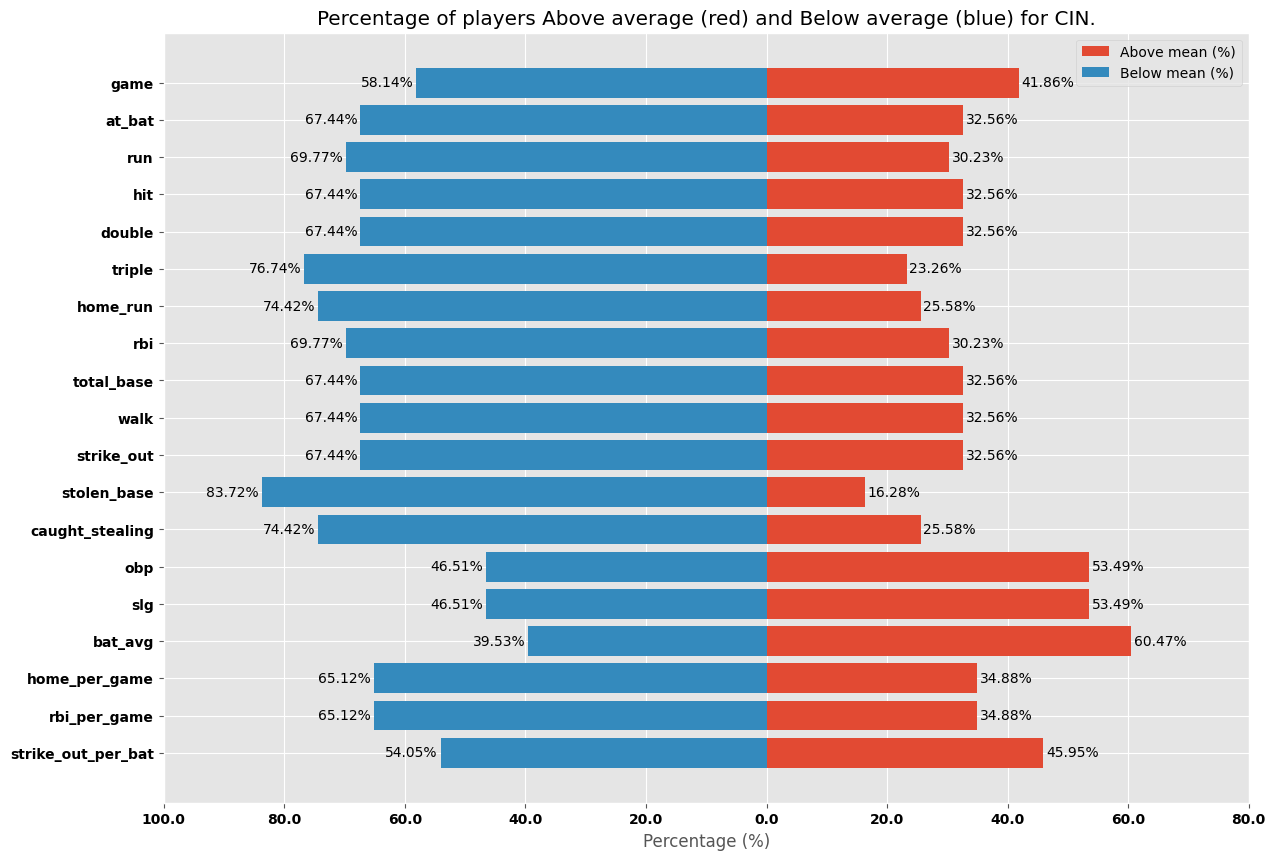

In [72]:
best_worst_cin = pd.DataFrame({"Above": list(team_dict["CIN"]["percents_above"].values()),
                               "Below": list(team_dict["CIN"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_cin)

graphs_above_below("CIN", best_worst_cin)

In [73]:
best_players_cin = best_players_teams_ids(team_dict, "CIN")
print(f"Cincinnati Reds had {len(best_players_cin)} above-average players in all features")

players_cin, markdown_cin, all_players_cin = players_details(best_players_cin, "CIN")

Cincinnati Reds had 31 above-average players in all features


**Detroit Tigers**

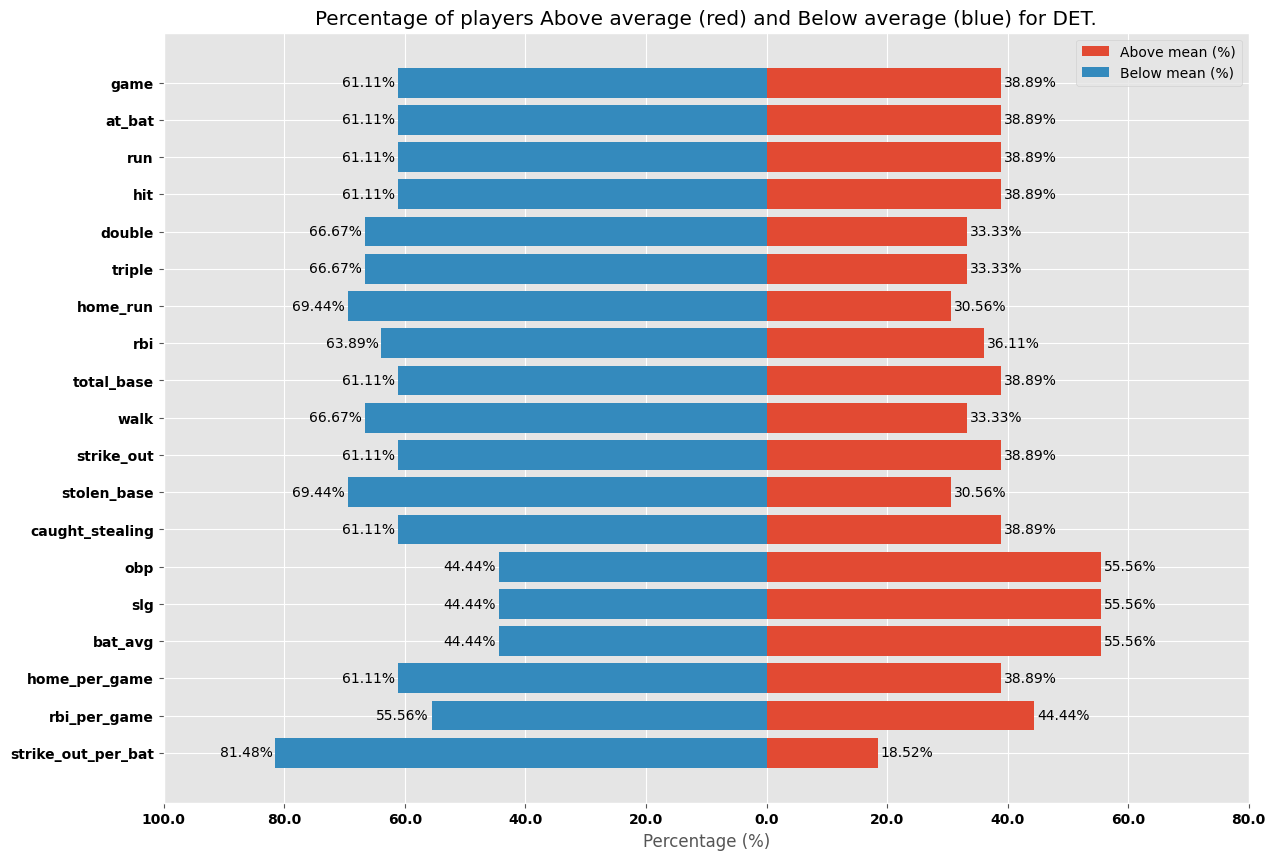

In [74]:
best_worst_det = pd.DataFrame({"Above": list(team_dict["DET"]["percents_above"].values()),
                               "Below": list(team_dict["DET"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_det)

graphs_above_below("DET", best_worst_det)

In [75]:
best_players_det = best_players_teams_ids(team_dict, "DET")
print(f"Detroit Tigers had {len(best_players_det)} above-average players in all features")

players_det, markdown_det, all_players_det = players_details(best_players_det, "DET")

Detroit Tigers had 20 above-average players in all features


**Los Angeles Angels**

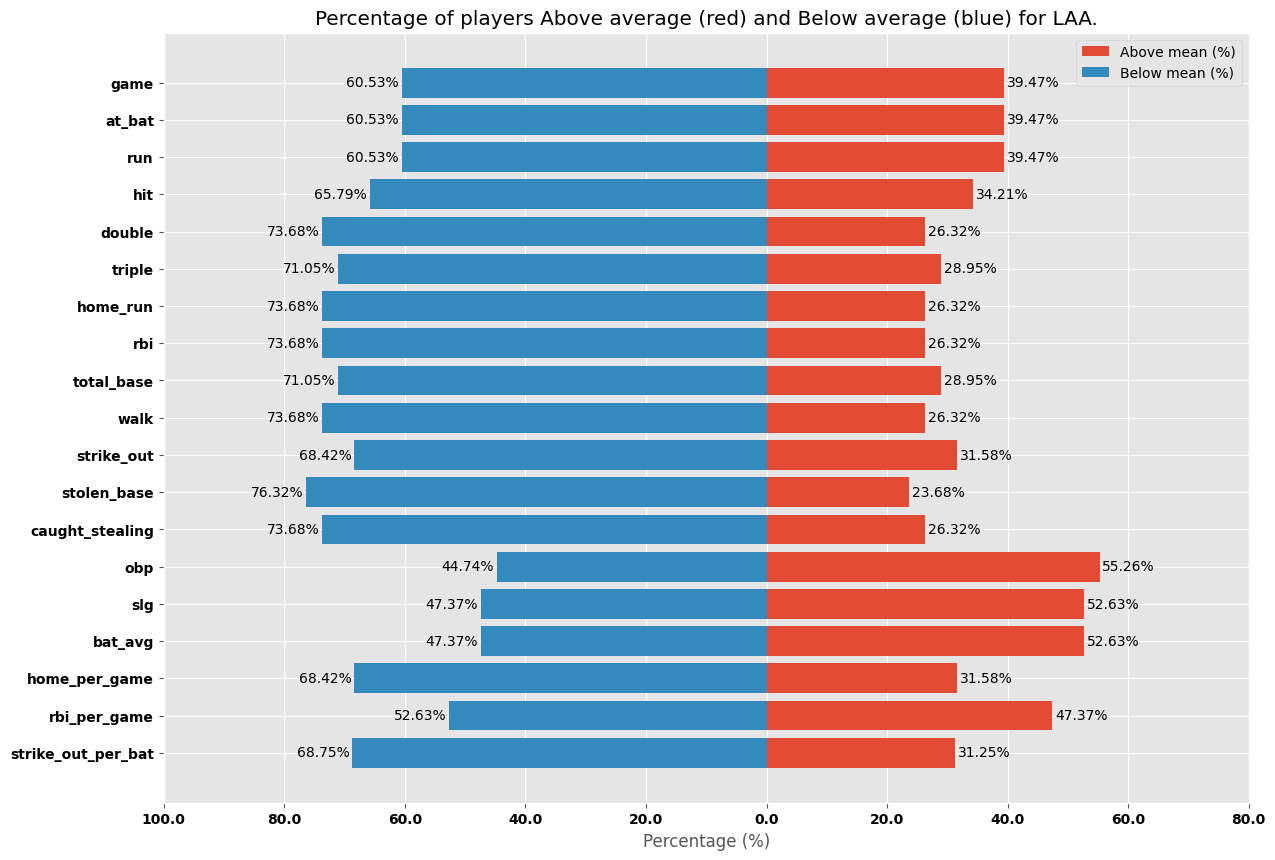

In [76]:
best_worst_laa = pd.DataFrame({"Above": list(team_dict["LAA"]["percents_above"].values()),
                               "Below": list(team_dict["LAA"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_laa)

graphs_above_below("LAA", best_worst_laa)

In [77]:
best_players_laa = best_players_teams_ids(team_dict, "LAA")
print(f"Los Angeles Angels had {len(best_players_laa)} above-average players in all features")

players_laa, markdown_laa, all_players_laa = players_details(best_players_laa, "LAA")

Los Angeles Angels had 24 above-average players in all features


**Houston Astros**

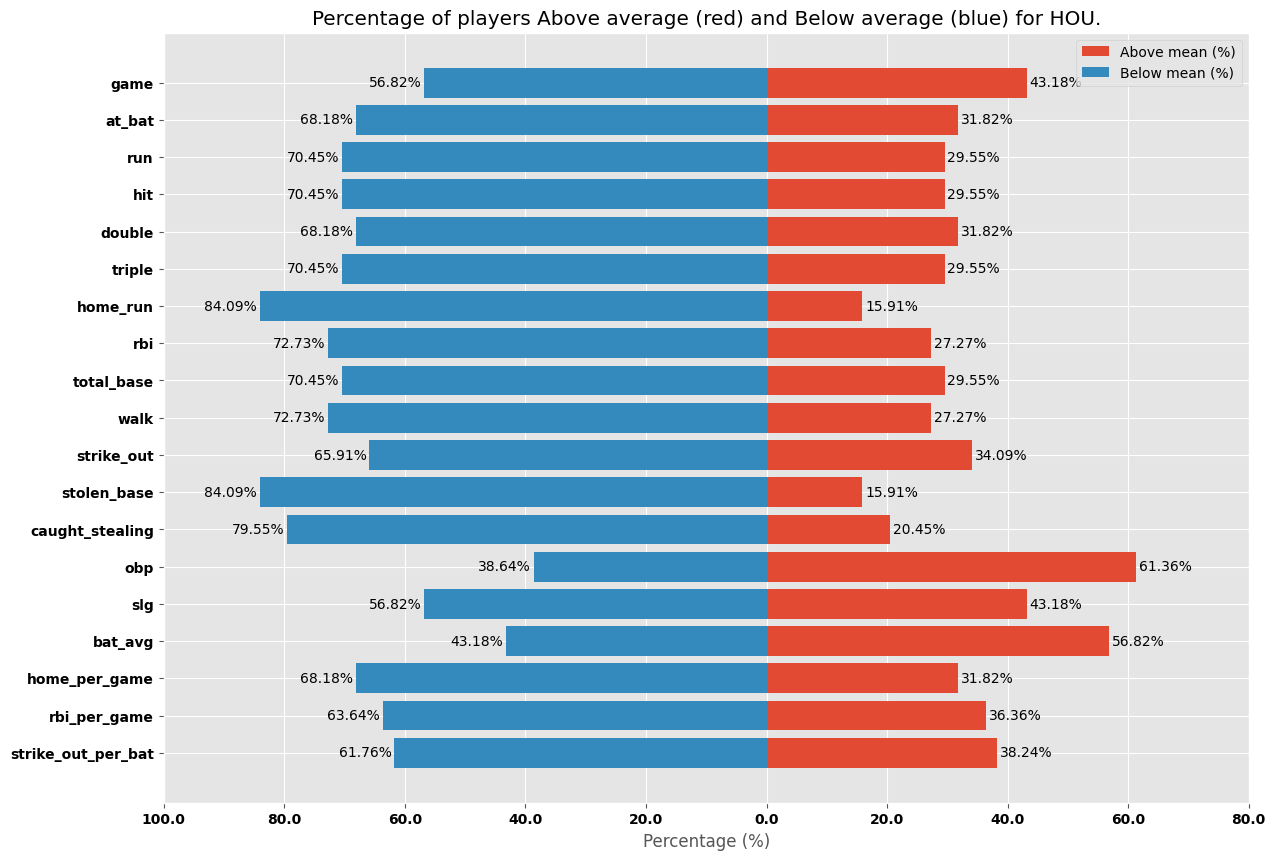

In [78]:
best_worst_hou = pd.DataFrame({"Above": list(team_dict["HOU"]["percents_above"].values()),
                               "Below": list(team_dict["HOU"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_hou)

graphs_above_below("HOU", best_worst_hou)

In [79]:
best_players_hou = best_players_teams_ids(team_dict, "HOU")
print(f"Houston Astros had {len(best_players_hou)} above-average players in all features")

players_hou, markdown_hou, all_players_hou = players_details(best_players_hou, "HOU")

Houston Astros had 31 above-average players in all features


**San Diego Padres**

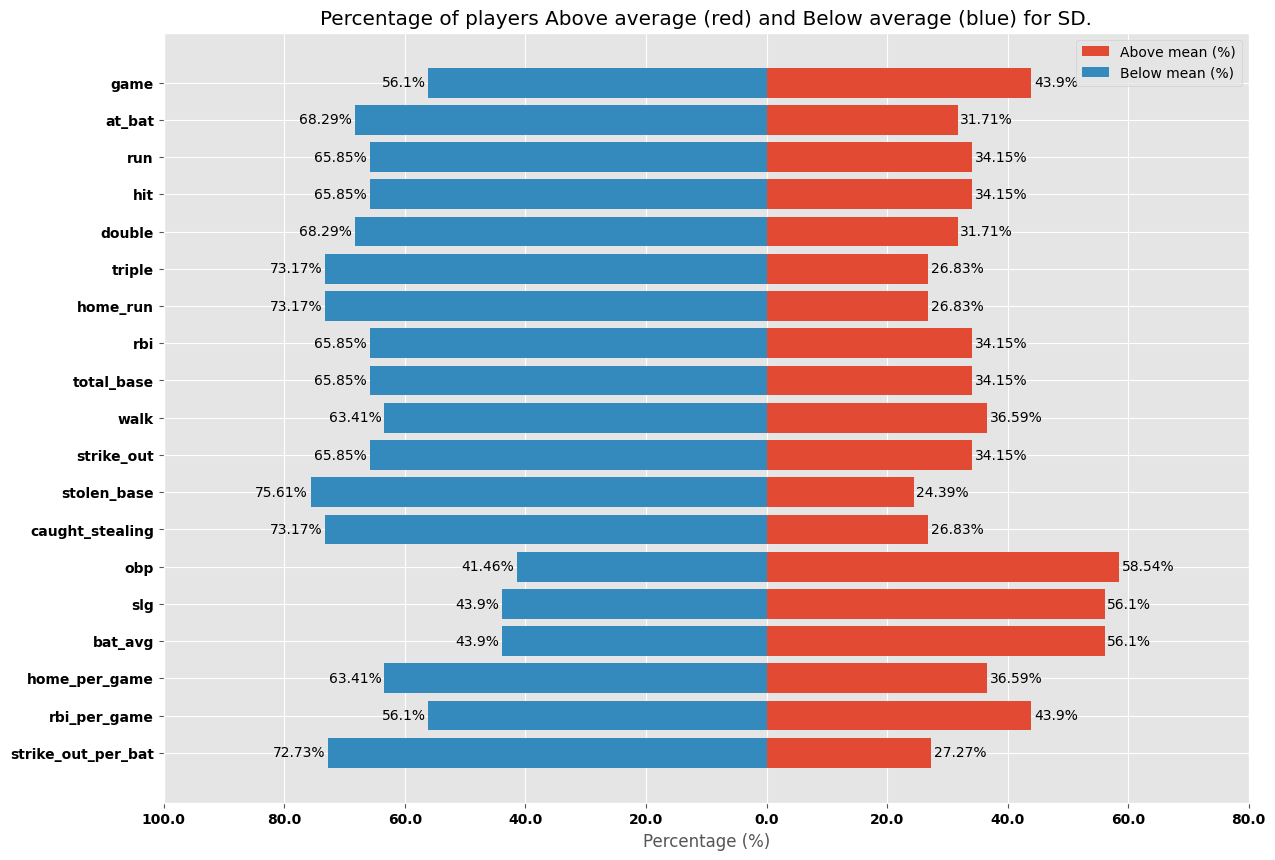

In [80]:
best_worst_sd = pd.DataFrame({"Above": list(team_dict["SD"]["percents_above"].values()),
                               "Below": list(team_dict["SD"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_sd)

graphs_above_below("SD", best_worst_sd)

In [81]:
best_players_sd = best_players_teams_ids(team_dict, "SD")
print(f"San Diego Padres had {len(best_players_sd)} above-average players in all features")

players_sd, markdown_sd, all_players_sd = players_details(best_players_sd, "SD")

San Diego Padres had 29 above-average players in all features


**Los Angeles Dodgers**

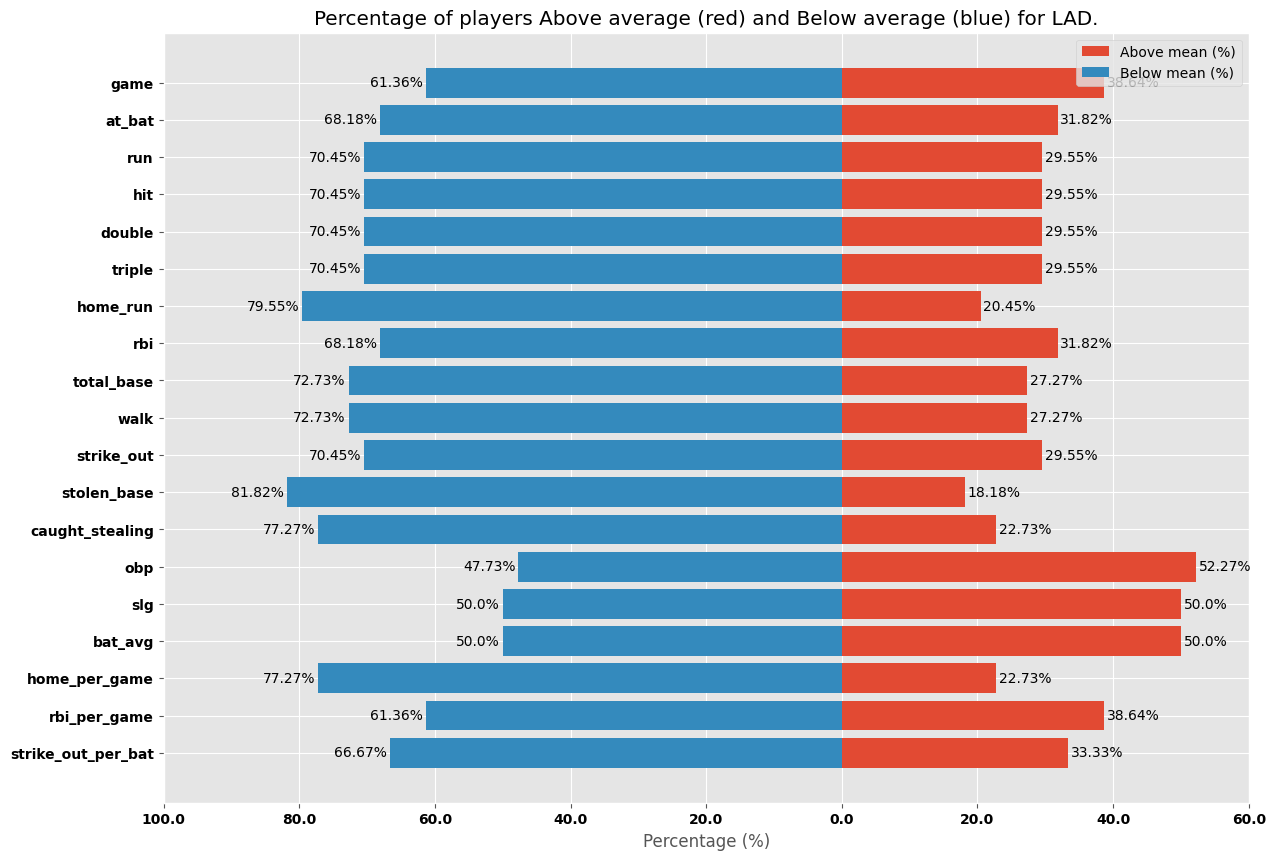

In [82]:
best_worst_lad = pd.DataFrame({"Above": list(team_dict["LAD"]["percents_above"].values()),
                               "Below": list(team_dict["LAD"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_lad)

graphs_above_below("LAD", best_worst_lad)

In [83]:
best_players_lad = best_players_teams_ids(team_dict, "LAD")
print(f"Los Angeles Dodgers had {len(best_players_lad)} above-average players in all features")

players_lad, markdown_lad, all_players_lad = players_details(best_players_lad, "LAD")

Los Angeles Dodgers had 29 above-average players in all features


**Tampa Bay Rays**

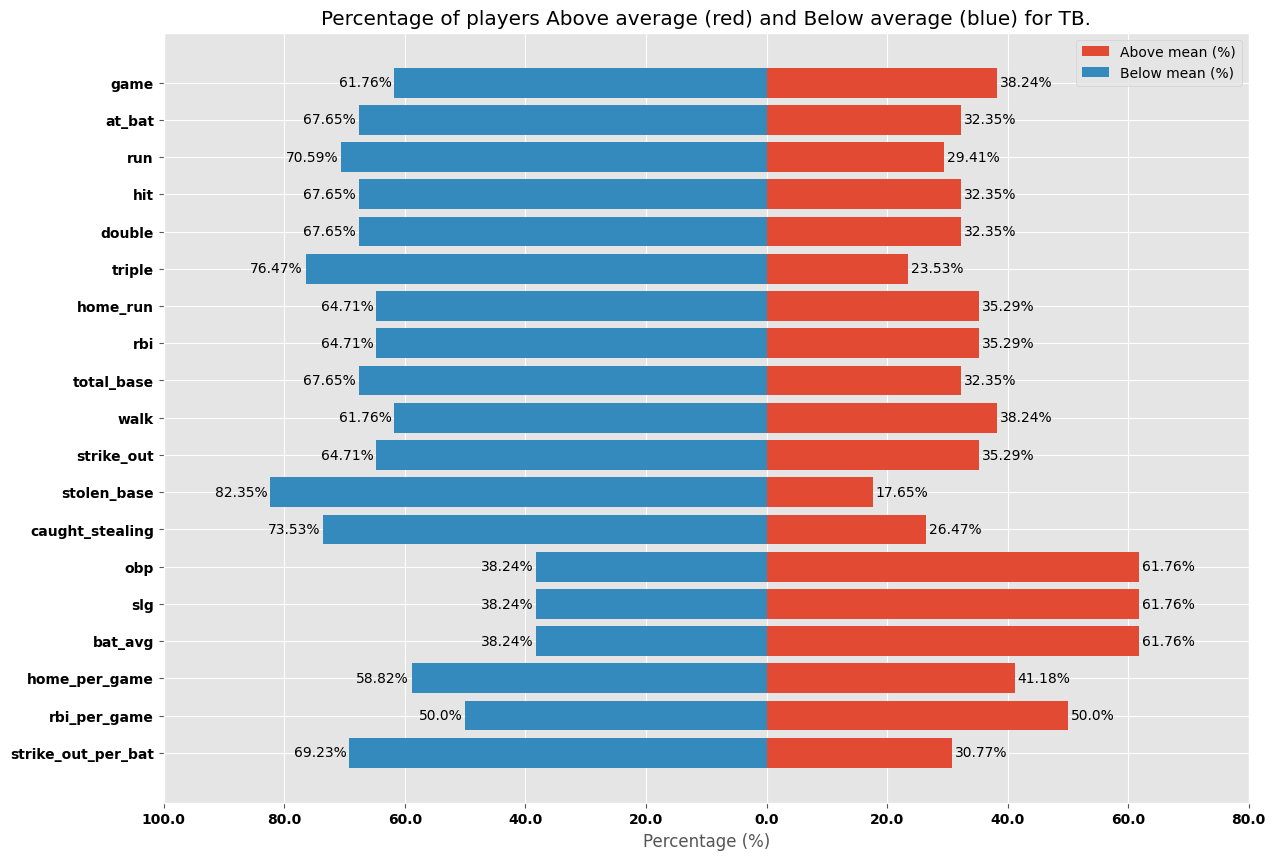

In [84]:
best_worst_tb = pd.DataFrame({"Above": list(team_dict["TB"]["percents_above"].values()),
                               "Below": list(team_dict["TB"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_tb)

graphs_above_below("TB", best_worst_tb)

In [85]:
best_players_tb = best_players_teams_ids(team_dict, "TB")
print(f"Tampa Bay Rays had {len(best_players_tb)} above-average players in all features")

players_tb, markdown_tb, all_players_tb = players_details(best_players_tb, "TB")

Tampa Bay Rays had 21 above-average players in all features


**Atlanta Braves**

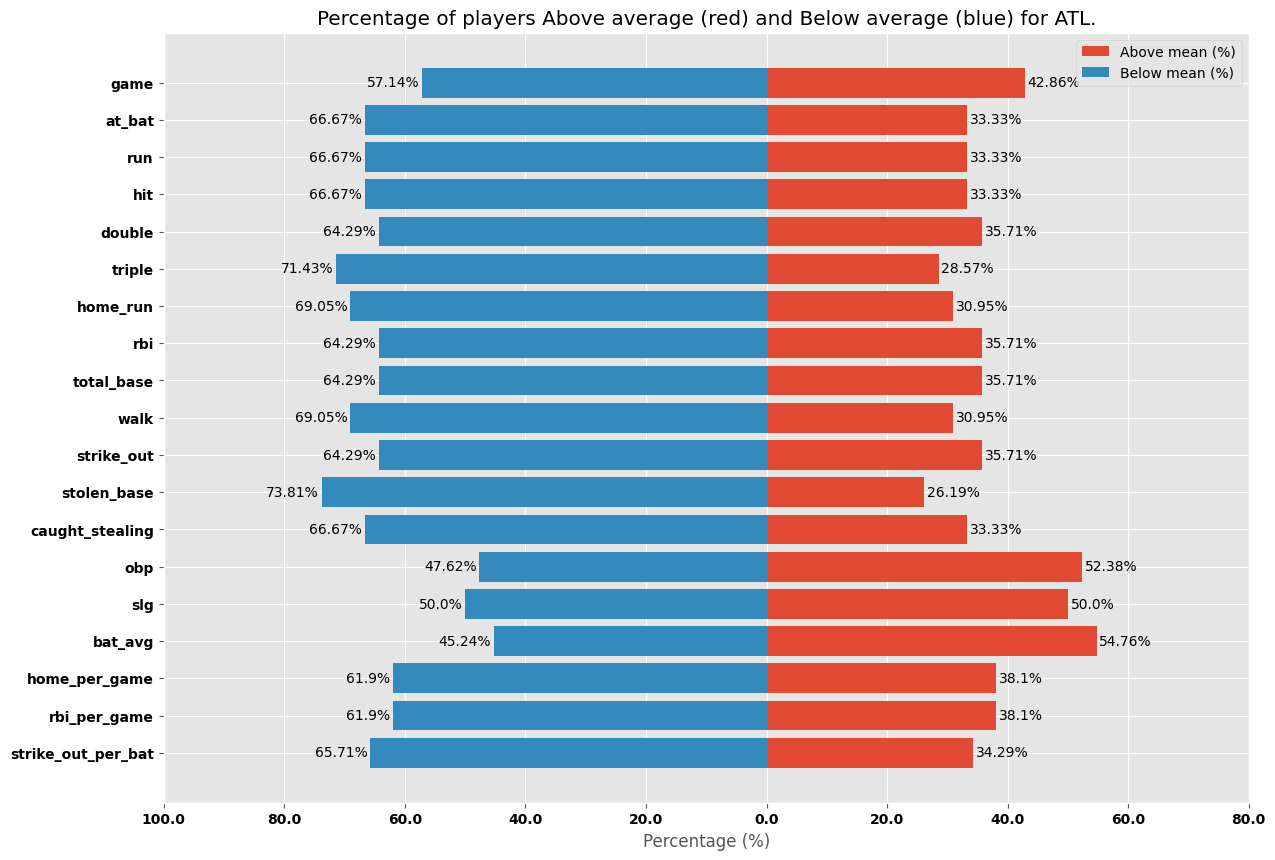

In [86]:
best_worst_atl = pd.DataFrame({"Above": list(team_dict["ATL"]["percents_above"].values()),
                               "Below": list(team_dict["ATL"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_atl)

graphs_above_below("ATL", best_worst_atl)

In [87]:
best_players_atl = best_players_teams_ids(team_dict, "ATL")
print(f"Atlanta Braves had {len(best_players_atl)} above-average players in all features")

players_atl, markdown_atl, all_players_atl = players_details(best_players_atl, "ATL")

Atlanta Braves had 29 above-average players in all features


**St. Louis Cardinals**

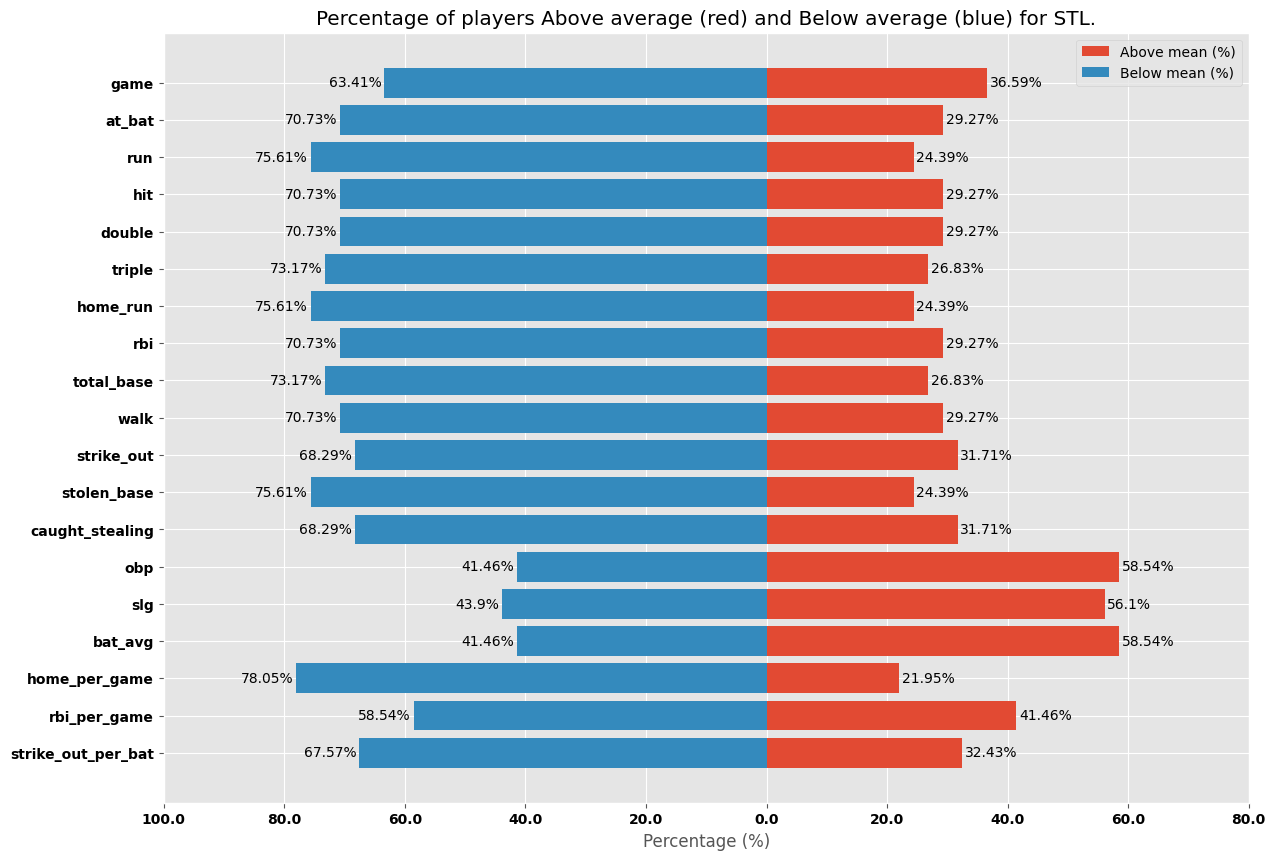

In [88]:
best_worst_stl = pd.DataFrame({"Above": list(team_dict["STL"]["percents_above"].values()),
                               "Below": list(team_dict["STL"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_stl)

graphs_above_below("STL", best_worst_stl)

In [89]:
best_players_stl = best_players_teams_ids(team_dict, "STL")
print(f"St. Louis Cardinals had {len(best_players_stl)} above-average players in all features")

players_stl, markdown_stl, all_players_stl = players_details(best_players_stl, "STL")

St. Louis Cardinals had 28 above-average players in all features


**Kansas City Royals**

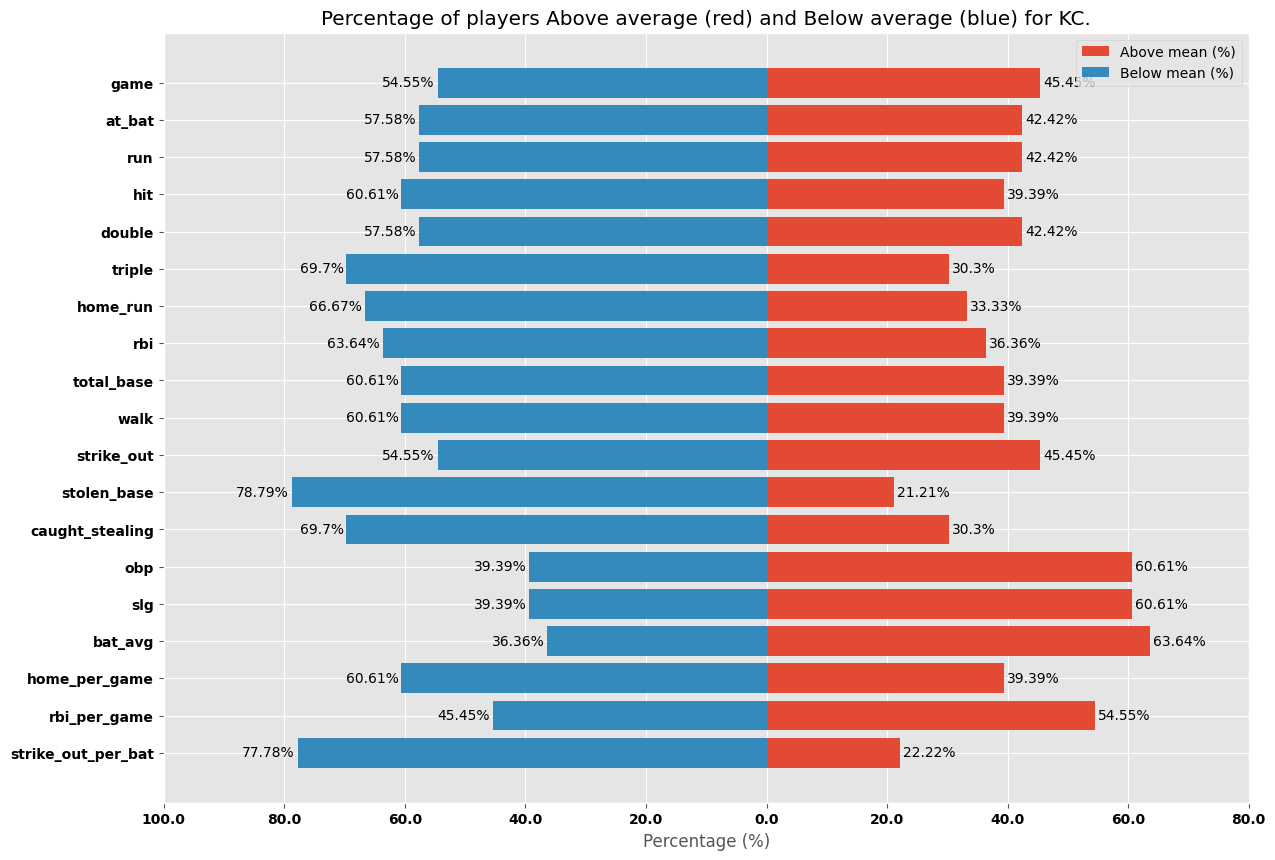

In [90]:
best_worst_kc = pd.DataFrame({"Above": list(team_dict["KC"]["percents_above"].values()),
                               "Below": list(team_dict["KC"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_kc)

graphs_above_below("KC", best_worst_kc)

In [91]:
best_players_kc = best_players_teams_ids(team_dict, "KC")
print(f"Kansas City Royals had {len(best_players_kc)} above-average players in all features")

players_kc, markdown_kc, all_players_kc = players_details(best_players_kc, "KC")

Kansas City Royals had 22 above-average players in all features


**Pittsburgh Pirates**

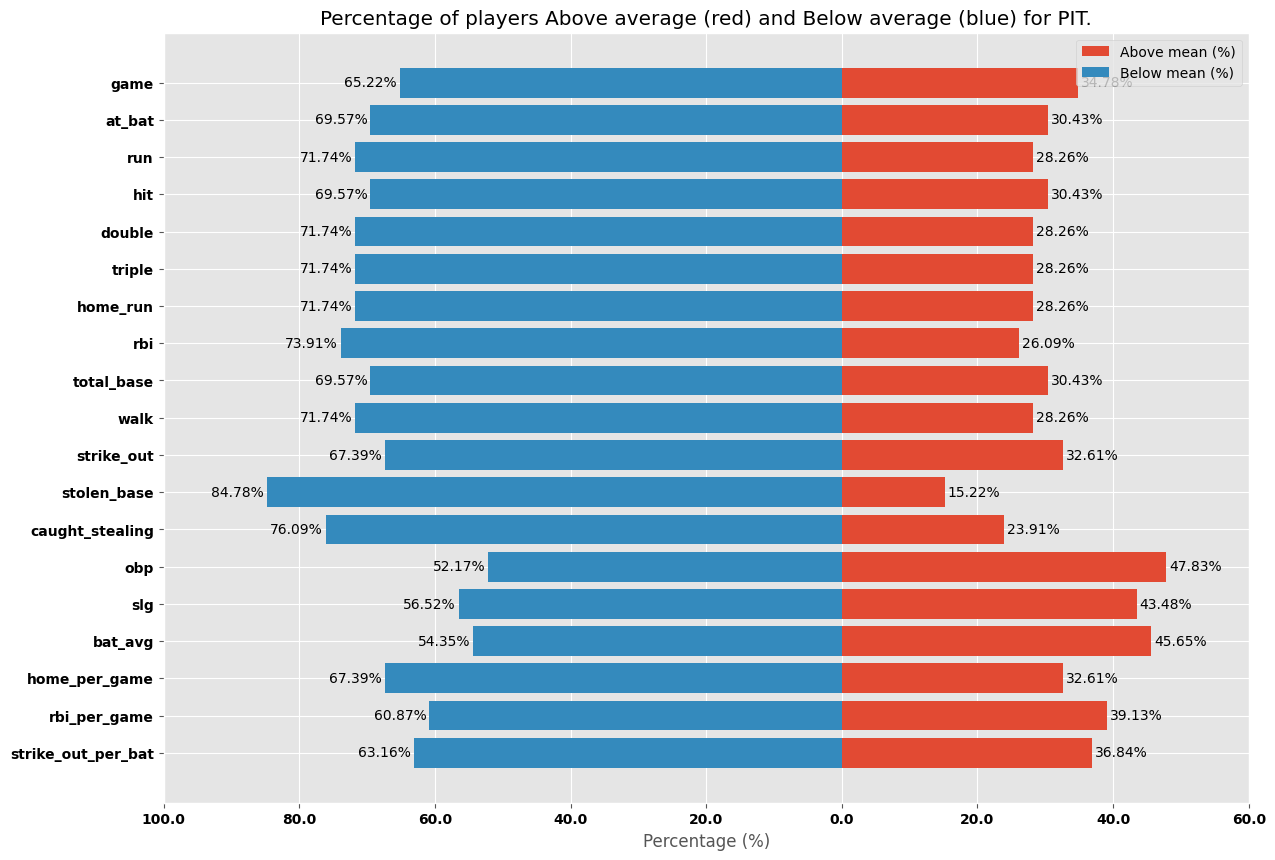

In [92]:
best_worst_pit = pd.DataFrame({"Above": list(team_dict["PIT"]["percents_above"].values()),
                               "Below": list(team_dict["PIT"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_pit)

graphs_above_below("PIT", best_worst_pit)

In [93]:
best_players_pit = best_players_teams_ids(team_dict, "PIT")
print(f"Pittsburgh Pirates had {len(best_players_pit)} above-average players in all features")

players_pit, markdown_pit, all_players_pit = players_details(best_players_pit, "PIT")

Pittsburgh Pirates had 25 above-average players in all features


**Toronto Blue Jays**

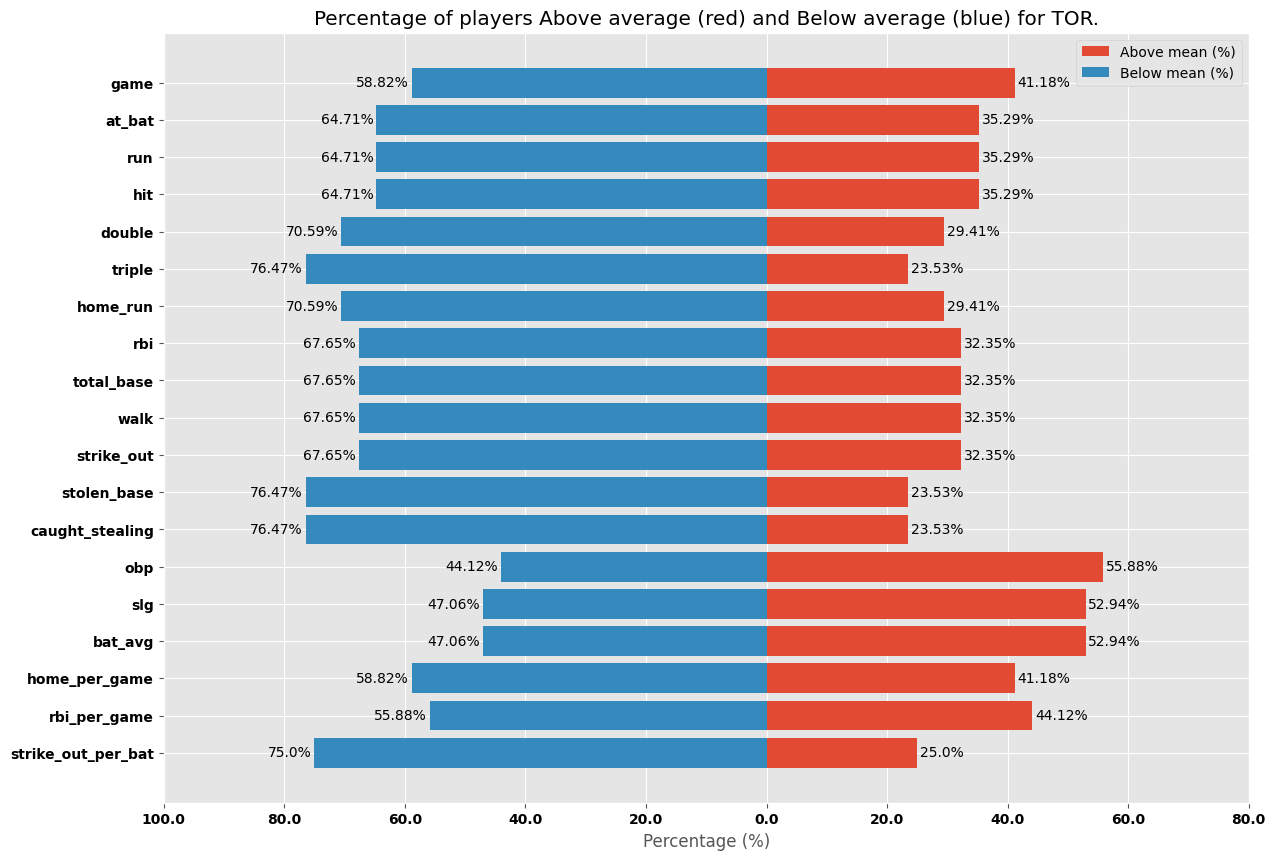

In [94]:
best_worst_tor = pd.DataFrame({"Above": list(team_dict["TOR"]["percents_above"].values()),
                               "Below": list(team_dict["TOR"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_tor)

graphs_above_below("TOR", best_worst_tor)

In [95]:
best_players_tor = best_players_teams_ids(team_dict, "TOR")
print(f"Toronto Blue Jays had {len(best_players_tor)} above-average players in all features")

players_tor, markdown_tor, all_players_tor = players_details(best_players_tor, "TOR")

Toronto Blue Jays had 21 above-average players in all features


**Miami Marlins**

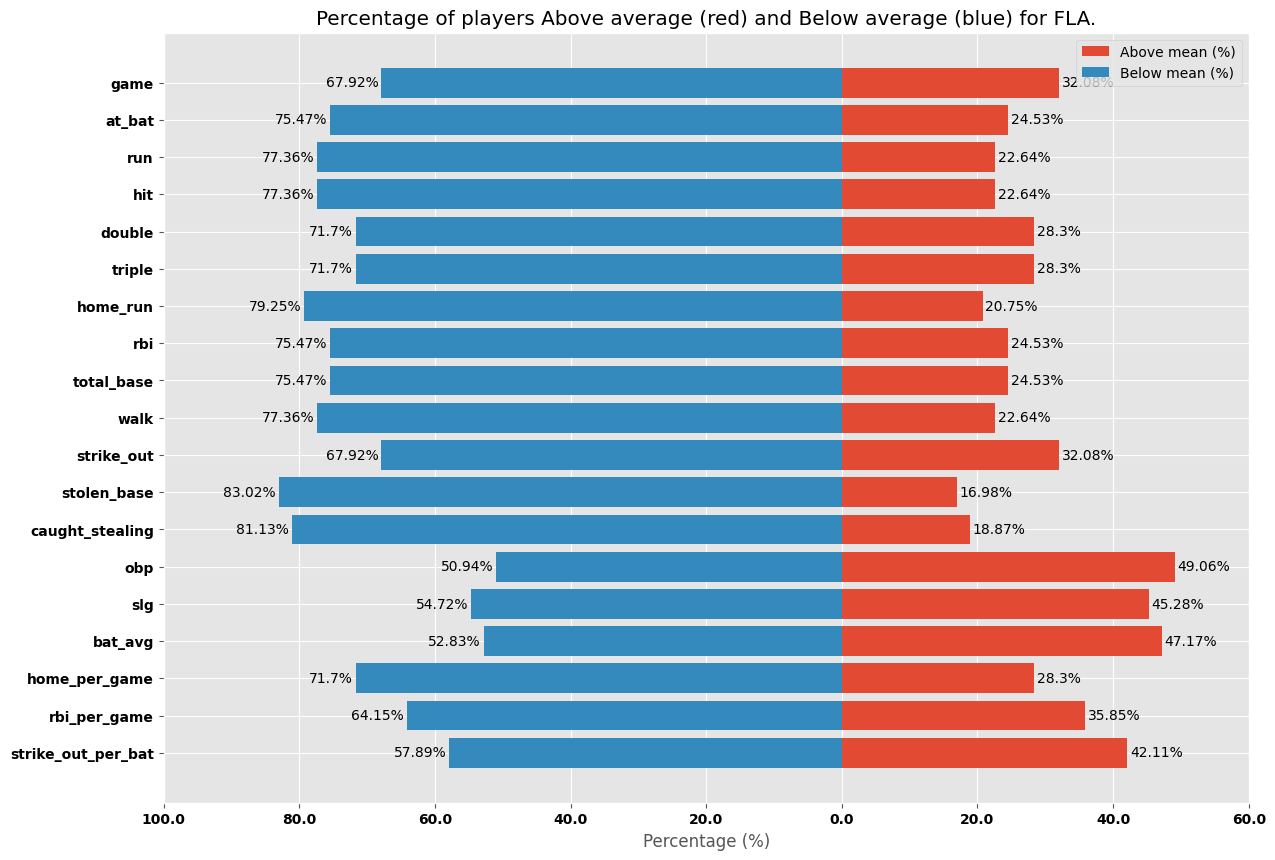

In [96]:
best_worst_fla = pd.DataFrame({"Above": list(team_dict["FLA"]["percents_above"].values()),
                               "Below": list(team_dict["FLA"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_fla)

graphs_above_below("FLA", best_worst_fla)

In [97]:
best_players_fla = best_players_teams_ids(team_dict, "FLA")
print(f"Miami Marlins had {len(best_players_fla)} above-average players in all features")

players_fla, markdown_fla, all_players_fla = players_details(best_players_fla, "FLA")

Miami Marlins had 35 above-average players in all features


**Colorado Rockies**

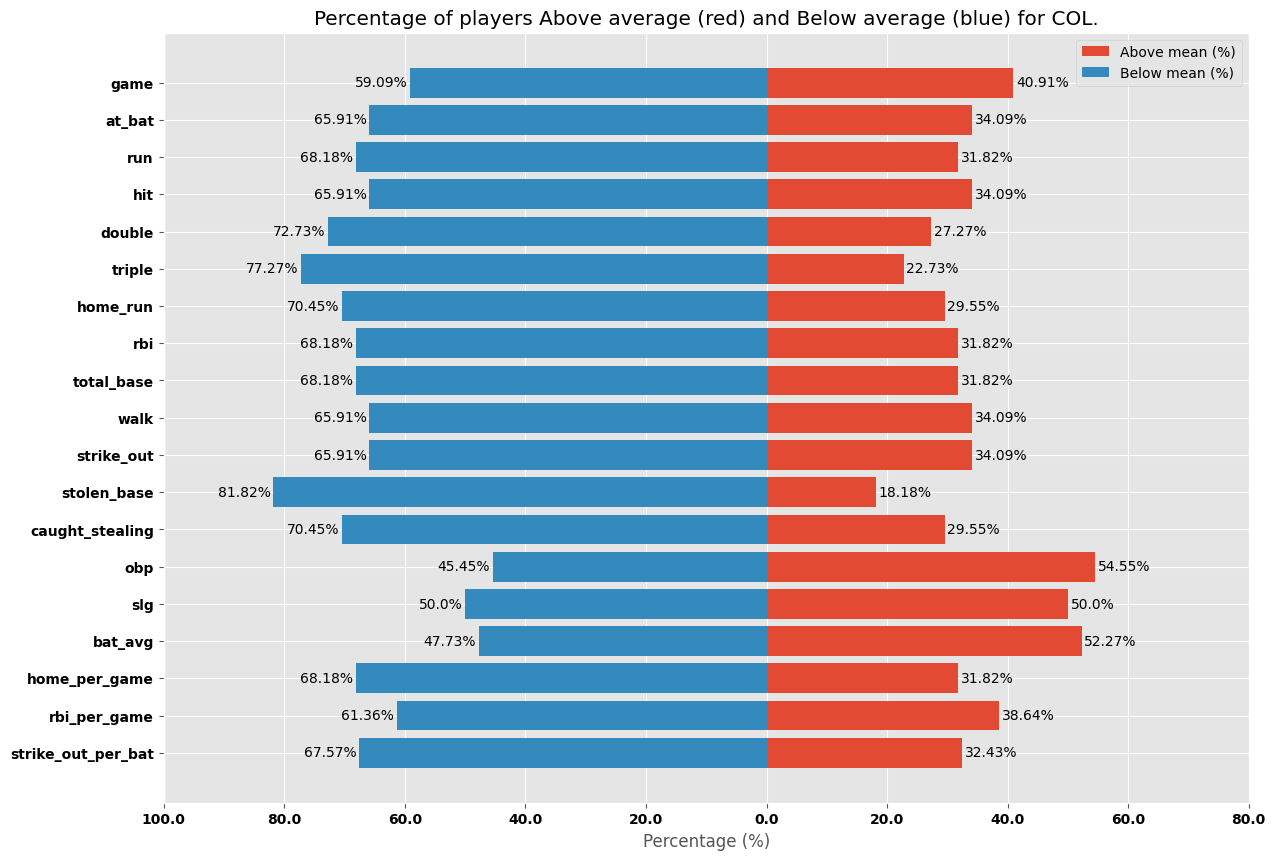

In [98]:
best_worst_col = pd.DataFrame({"Above": list(team_dict["COL"]["percents_above"].values()),
                               "Below": list(team_dict["COL"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_col)

graphs_above_below("COL", best_worst_col)

In [99]:
best_players_col = best_players_teams_ids(team_dict, "COL")
print(f"Colorado Rockies had {len(best_players_col)} above-average players in all features")

players_col, markdown_col, all_players_col = players_details(best_players_col, "COL")

Colorado Rockies had 30 above-average players in all features


**Philadelphia Phillies**

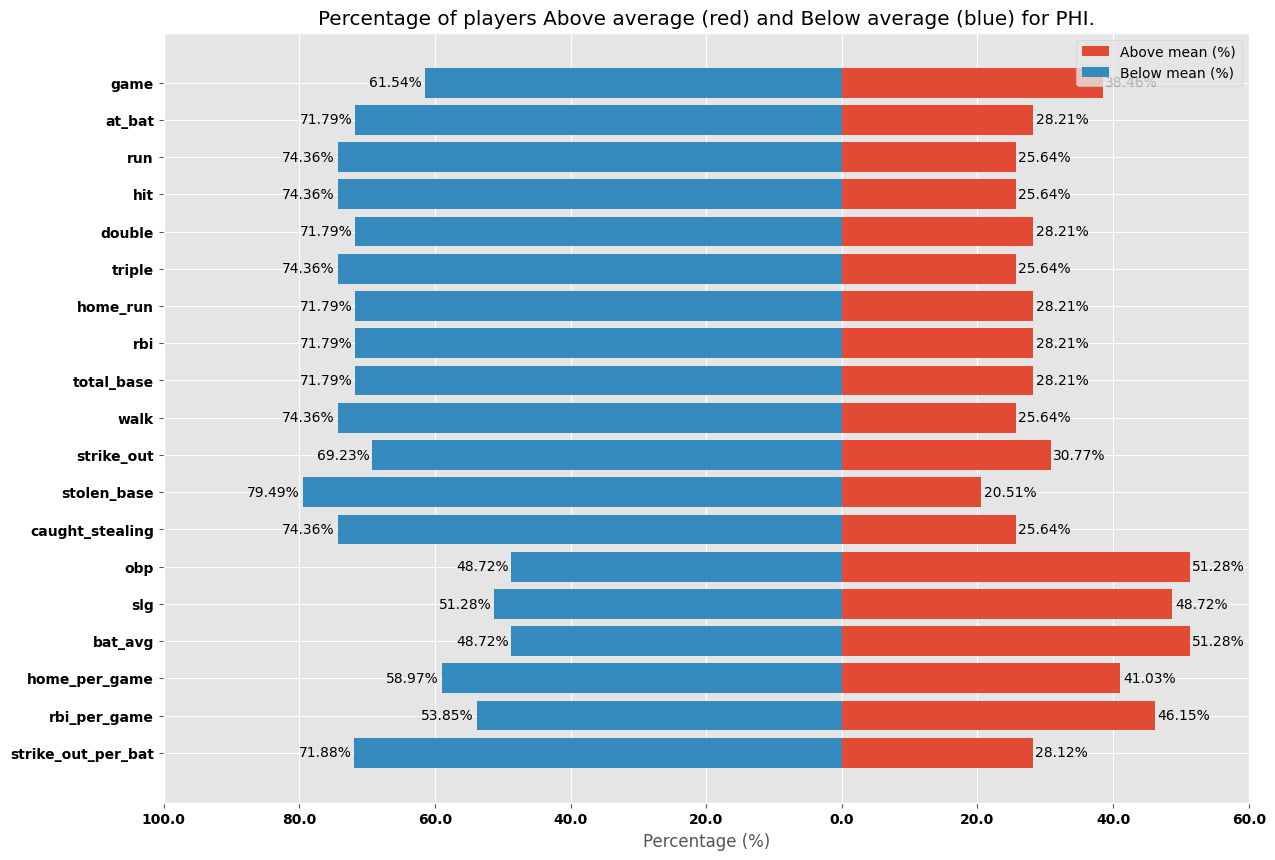

In [100]:
best_worst_phi = pd.DataFrame({"Above": list(team_dict["PHI"]["percents_above"].values()),
                               "Below": list(team_dict["PHI"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_phi)

graphs_above_below("PHI", best_worst_phi)

In [101]:
best_players_phi = best_players_teams_ids(team_dict, "PHI")
print(f"Philadelphia Phillies had {len(best_players_phi)} above-average players in all features")

players_phi, markdown_phi, all_players_phi = players_details(best_players_phi, "PHI")

Philadelphia Phillies had 24 above-average players in all features


**New York Mets**

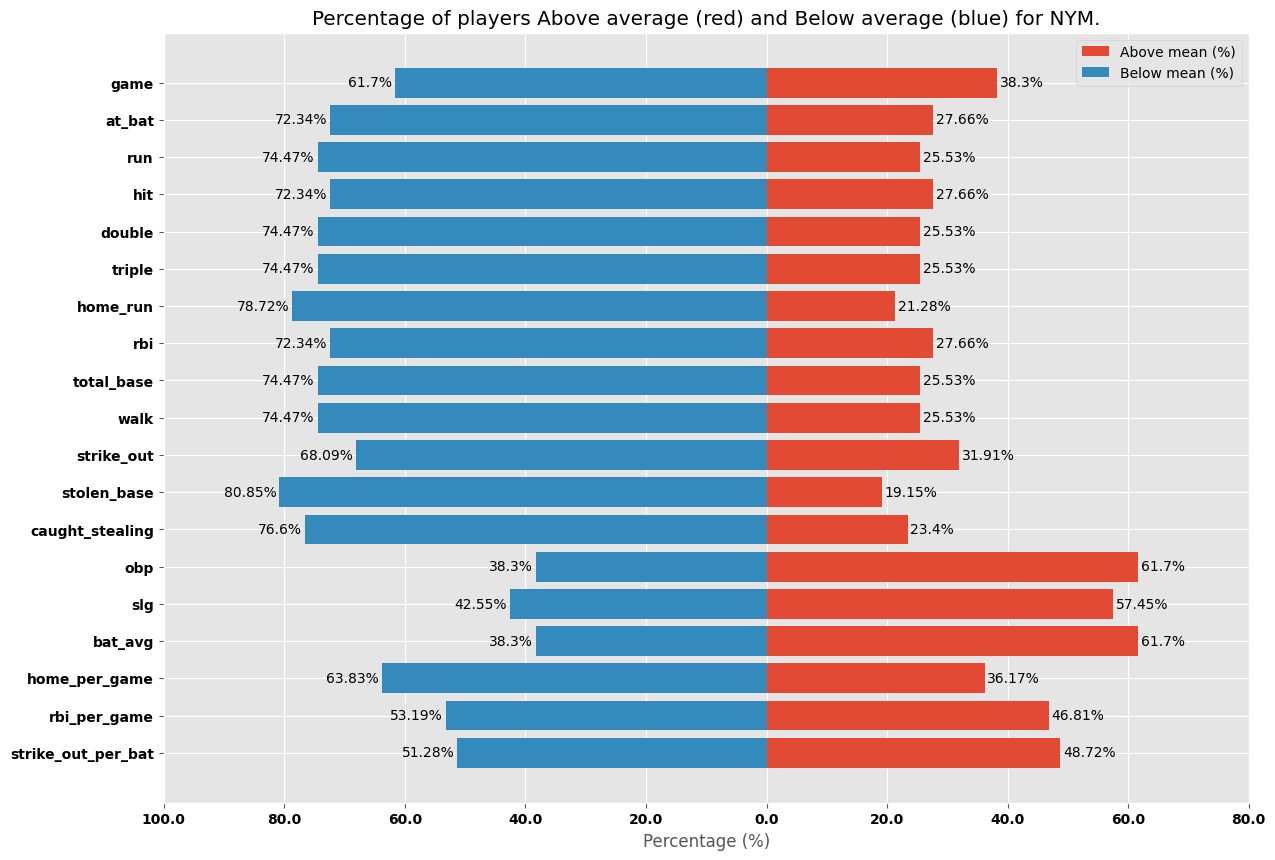

In [102]:
best_worst_nym = pd.DataFrame({"Above": list(team_dict["NYM"]["percents_above"].values()),
                               "Below": list(team_dict["NYM"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_nym)

graphs_above_below("NYM", best_worst_nym)

In [103]:
best_players_nym = best_players_teams_ids(team_dict, "NYM")
print(f"New York Mets had {len(best_players_nym)} above-average players in all features")

players_nym, markdown_nym, all_players_nym = players_details(best_players_nym, "NYM")

New York Mets had 36 above-average players in all features


**Arizona Diamondbacks**

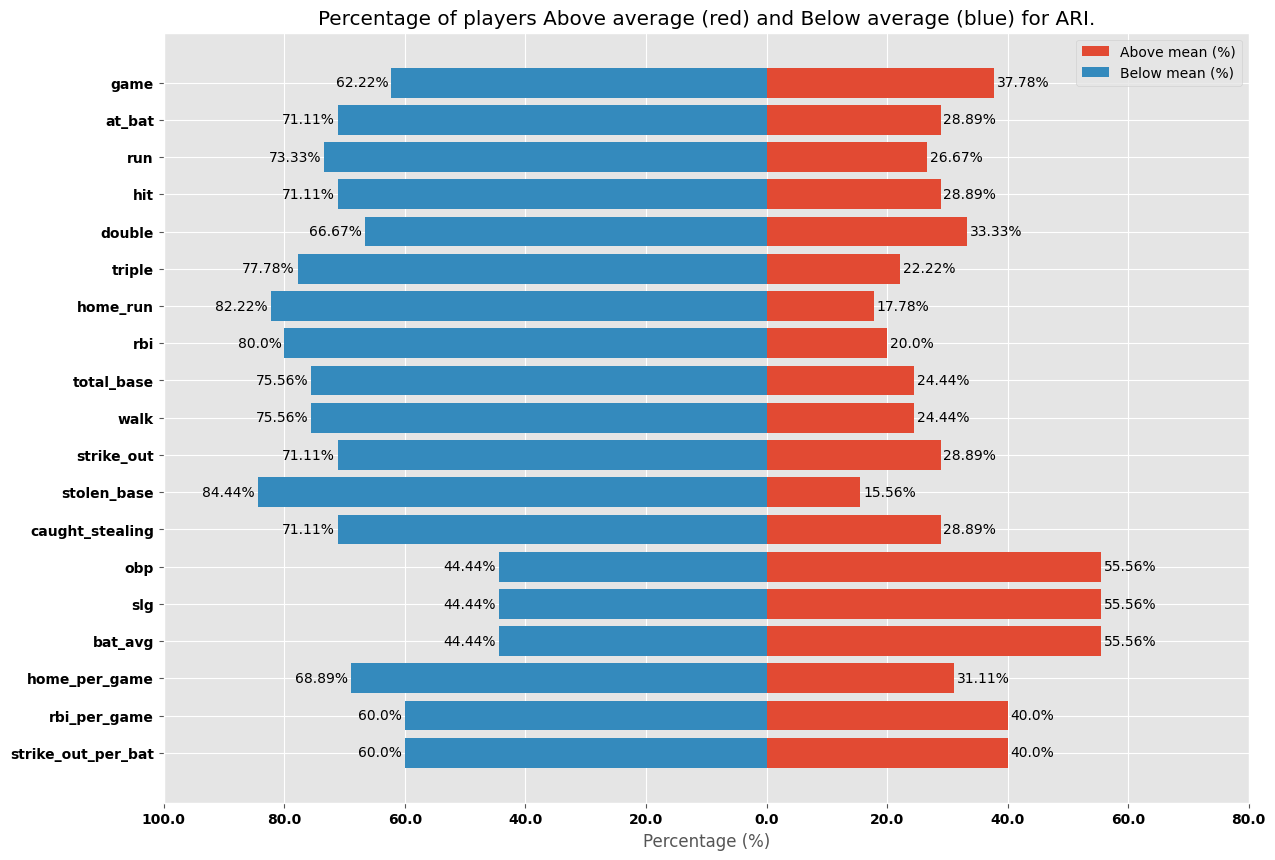

In [104]:
best_worst_ari = pd.DataFrame({"Above": list(team_dict["ARI"]["percents_above"].values()),
                               "Below": list(team_dict["ARI"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_ari)

graphs_above_below("ARI", best_worst_ari)

In [105]:
best_players_ari = best_players_teams_ids(team_dict, "ARI")
print(f"Arizona Diamondbacks had {len(best_players_ari)} above-average players in all features")

players_ari, markdown_ari, all_players_ari = players_details(best_players_ari, "ARI")

Arizona Diamondbacks had 31 above-average players in all features


**Chicago Cubs**

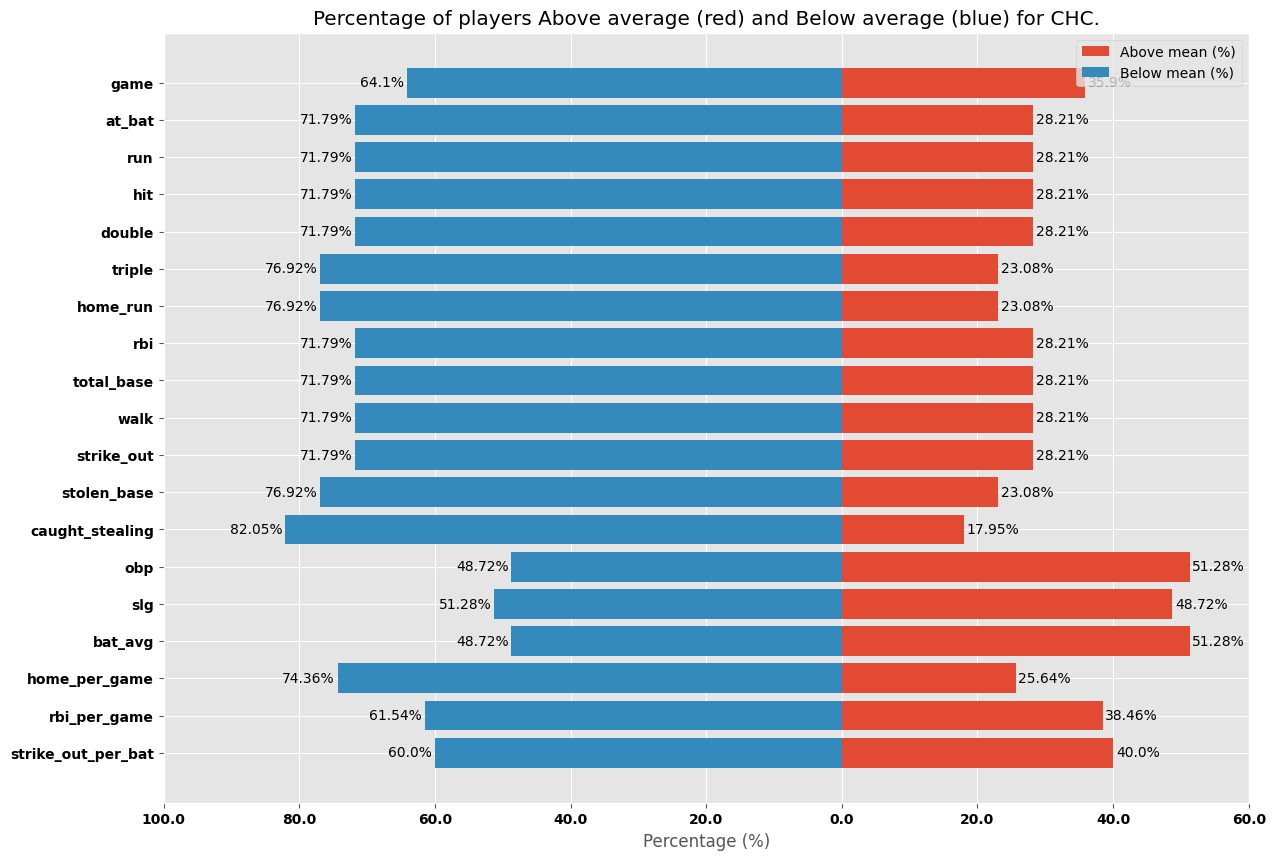

In [106]:
best_worst_chc = pd.DataFrame({"Above": list(team_dict["CHC"]["percents_above"].values()),
                               "Below": list(team_dict["CHC"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_chc)

graphs_above_below("CHC", best_worst_chc)

In [107]:
best_players_chc = best_players_teams_ids(team_dict, "CHC")
print(f"Chicago Cubs had {len(best_players_chc)} above-average players in all features")

players_chc, markdown_chc, all_players_chc = players_details(best_players_chc, "CHC")

Chicago Cubs had 23 above-average players in all features


**San Francisco Giants**

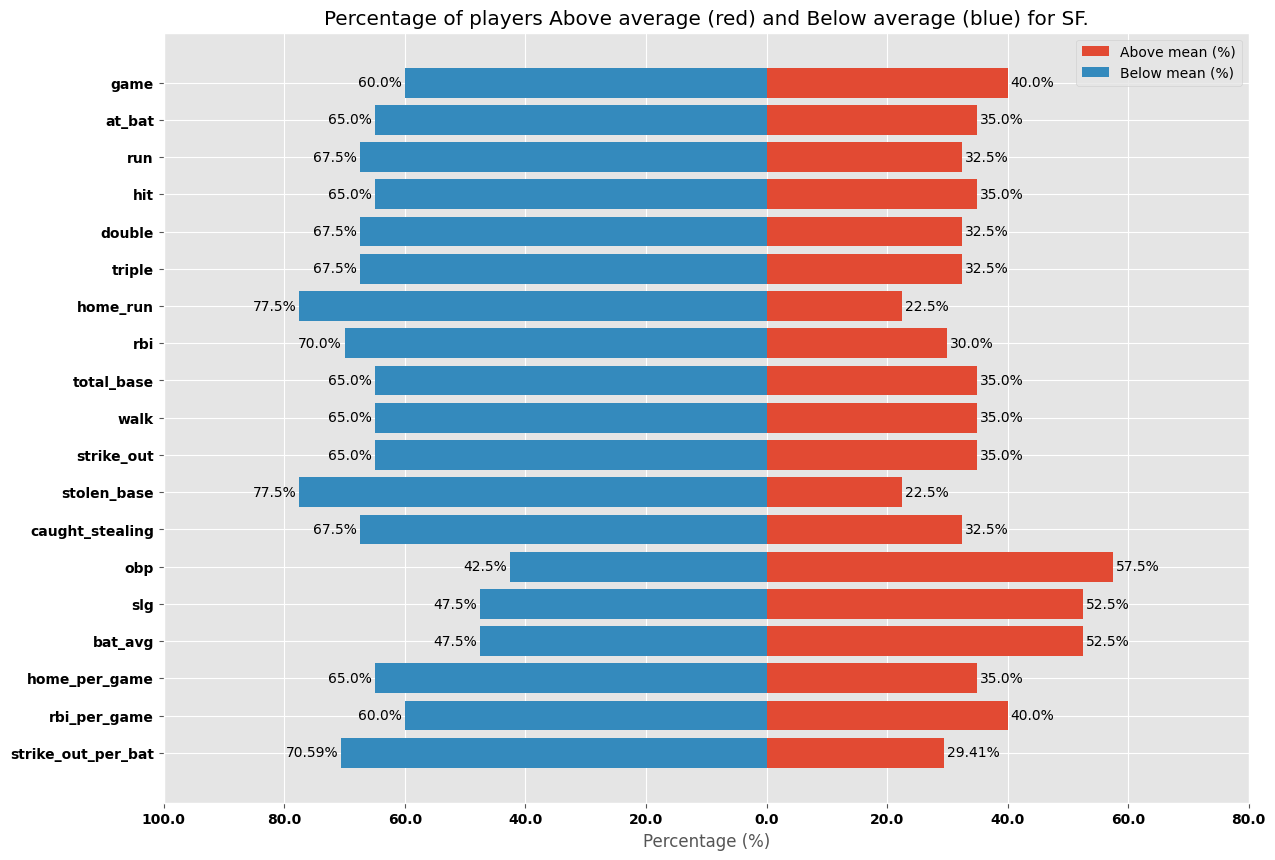

In [108]:
best_worst_sf = pd.DataFrame({"Above": list(team_dict["SF"]["percents_above"].values()),
                               "Below": list(team_dict["SF"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_sf)

graphs_above_below("SF", best_worst_sf)

In [109]:
best_players_sf = best_players_teams_ids(team_dict, "SF")
print(f"San Francisco Giants had {len(best_players_sf)} above-average players in all features")

players_sf, markdown_sf, all_players_sf = players_details(best_players_sf, "SF")

San Francisco Giants had 29 above-average players in all features


**Washington Nationals**

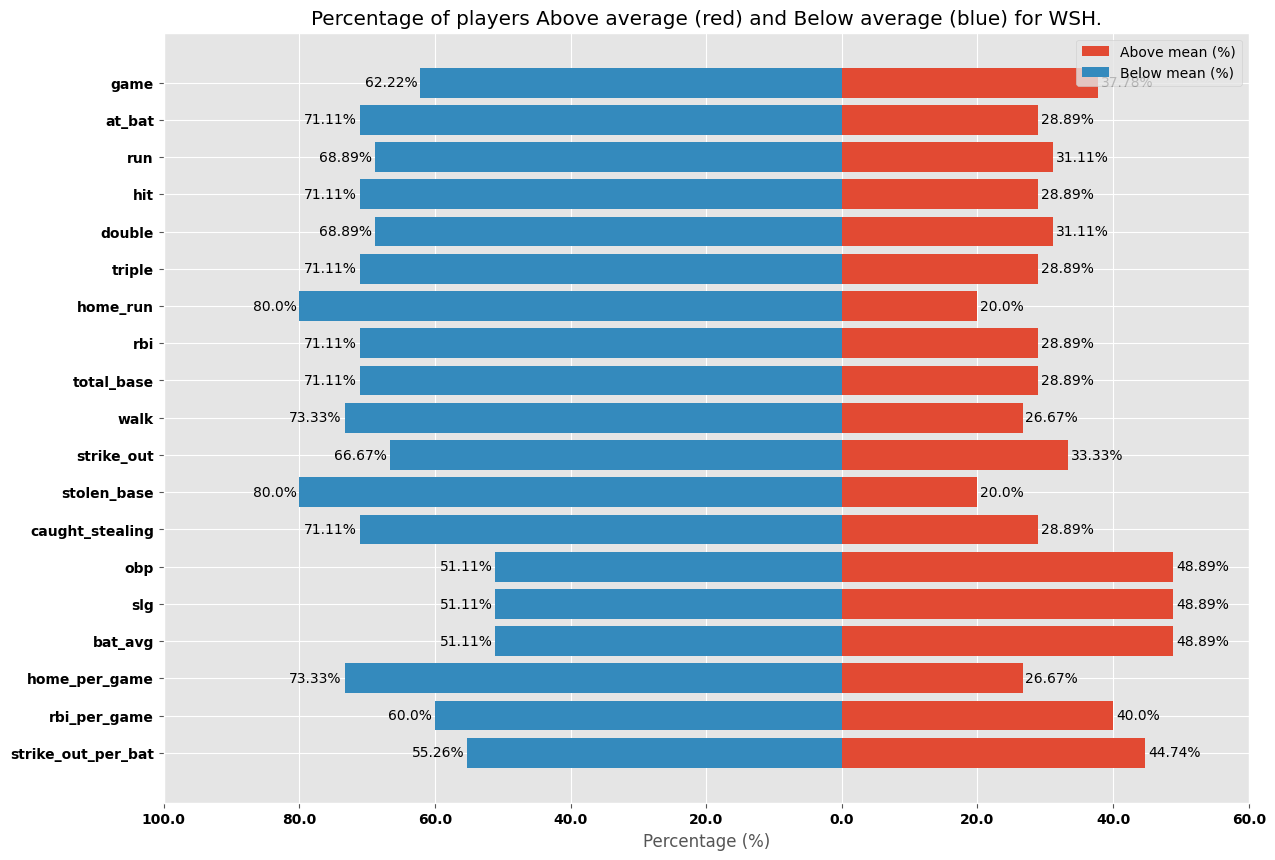

In [110]:
best_worst_wsh = pd.DataFrame({"Above": list(team_dict["WSH"]["percents_above"].values()),
                               "Below": list(team_dict["WSH"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])
percents_teams.append(best_worst_wsh)

graphs_above_below("WSH", best_worst_wsh)

In [111]:
best_players_wsh = best_players_teams_ids(team_dict, "WSH")
print(f"Washington Nationals had {len(best_worst_wsh)} above-average players in all features")

players_wsh, markdown_wsh, all_players_wsh = players_details(best_players_wsh, "WSH")

Washington Nationals had 19 above-average players in all features


**Oakland Athletics**

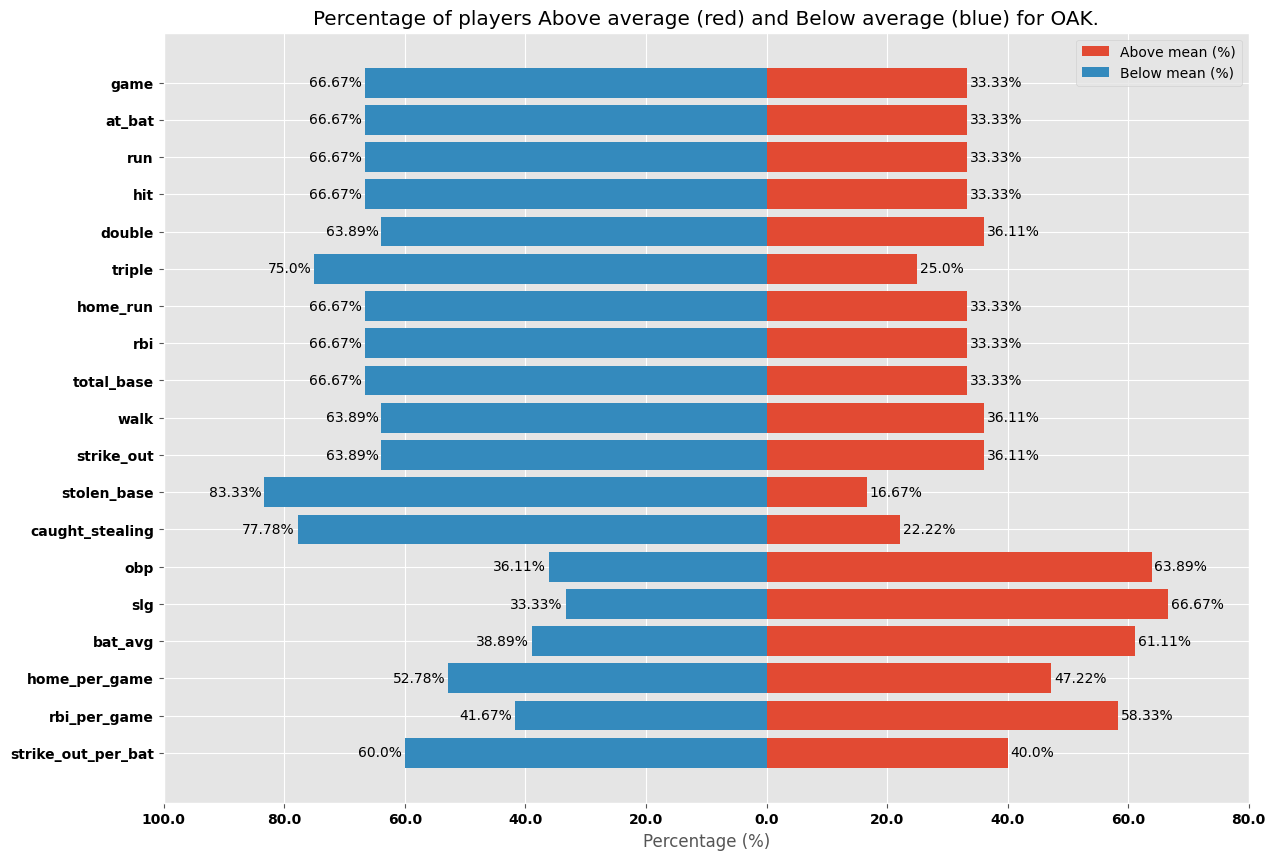

In [112]:
best_worst_oak = pd.DataFrame({"Above": list(team_dict["OAK"]["percents_above"].values()),
                               "Below": list(team_dict["OAK"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])

graphs_above_below("OAK", best_worst_oak)

In [113]:
best_players_oak = best_players_teams_ids(team_dict, "OAK")
print(f"Oakland Athletics had {len(best_players_oak)} above-average players in all features")

players_oak, markdown_oak, all_players_oak = players_details(best_players_oak, "OAK")

Oakland Athletics had 25 above-average players in all features


**Cleveland Guardians**

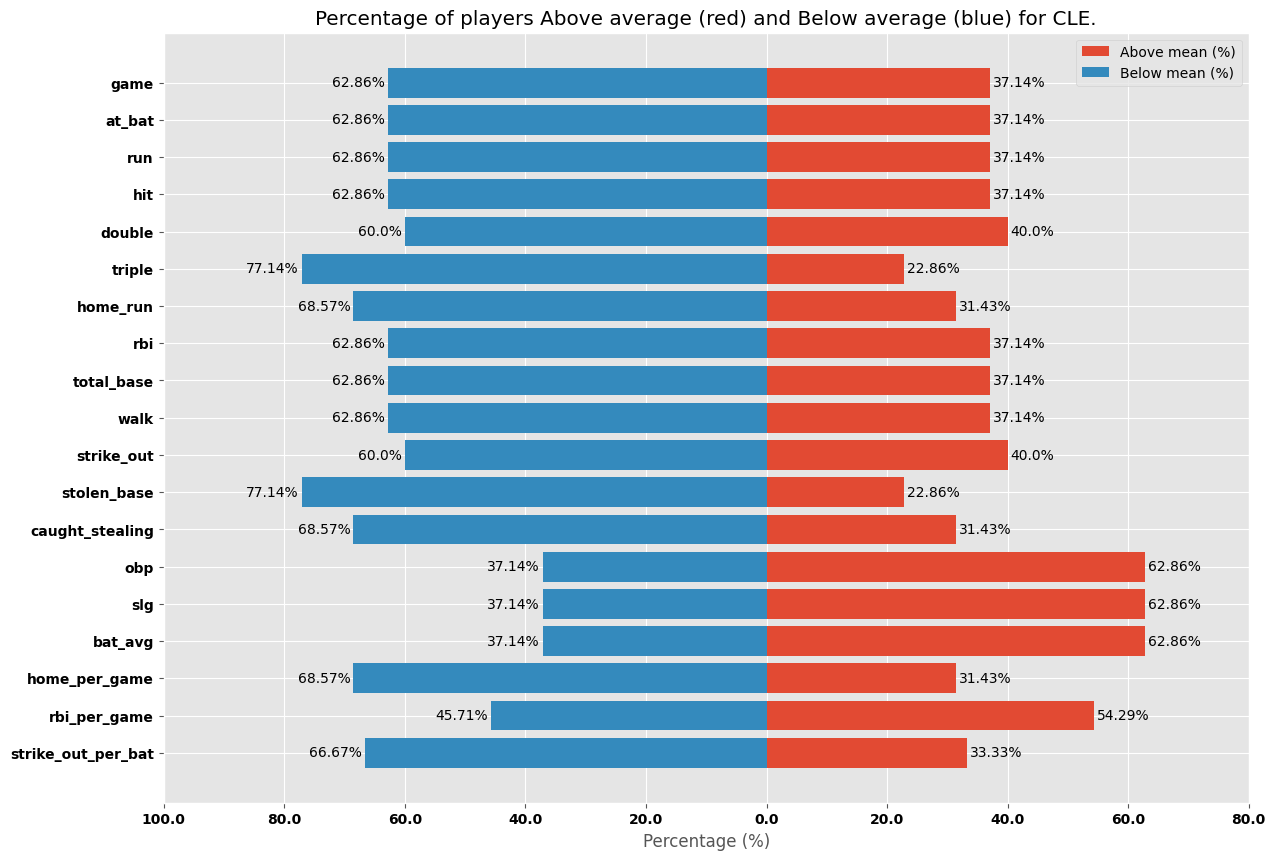

In [114]:
best_worst_cle = pd.DataFrame({"Above": list(team_dict["CLE"]["percents_above"].values()),
                               "Below": list(team_dict["CLE"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])

graphs_above_below("CLE", best_worst_cle)

In [115]:
best_players_cle = best_players_teams_ids(team_dict, "CLE")
print(f"Cleveland Guardians had {len(best_players_cle)} above-average players in all features")


#best players scores dataframe  
players_cle = pd.DataFrame({"Players": players_score(best_players_cle, "CLE").keys(), "Score": players_score(best_players_cle, "CLE").values()})
markdown_cle = players_cle.to_markdown(index=False)


#scores for all the players
all_players_cle = players_score(dt_baseball.loc[dt_baseball["team"] == "CLE"].index, "CLE")

Cleveland Guardians had 22 above-average players in all features


Best offensive players of all the league:

In [116]:
p75_obp = float(dt_baseball.describe()["obp"]["75%"])
p75_slg = float(dt_baseball.describe()["slg"]["75%"])
p75_bat_avg = float(dt_baseball.describe()["bat_avg"]["75%"])
p75_rbi = float(dt_baseball.describe()["rbi"]["75%"])
p75_home_run = float(dt_baseball.describe()["home_per_game"]["75%"])
p25_strike_out = float(dt_baseball.describe()["strike_out_per_bat"]["25%"])
columns_best_offensive = ["obp", "slg", "bat_avg", "rbi", "home_run", "strike_out"]
values_best_offensive = [p75_obp, p75_slg, p75_bat_avg, p75_rbi, p75_home_run, p25_strike_out]

players_offensive = dt_baseball.loc[(dt_baseball["obp"] > p75_obp) & 
                (dt_baseball["slg"] > p75_slg) &
                (dt_baseball["bat_avg"] > p75_bat_avg) &
                (dt_baseball["rbi"] > p75_rbi) &
                (dt_baseball["home_per_game"] > p75_home_run) &
                (dt_baseball["strike_out_per_bat"] < p25_strike_out)].copy()

players_offensive


,name,team,position,game,at_bat,run,hit,double,triple,home_run,...,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg,home_per_game,rbi_per_game,strike_out_per_bat
6,N Markakis,BAL,OF,160,629,79,187,45,3,12,...,73,93,7,2,0.370,0.436,0.297,0.075000,0.375000,0.147854
8,R Cano,NYY,2B,160,626,103,200,41,3,29,...,57,77,3,2,0.381,0.534,0.319,0.181250,0.681250,0.123003
9,B Phillips,CIN,2B,155,626,100,172,33,5,18,...,46,83,16,12,0.332,0.430,0.275,0.116129,0.380645,0.132588
10,R Braun,MIL,OF,157,619,101,188,45,1,25,...,56,105,14,3,0.365,0.501,0.304,0.159236,0.656051,0.169628
15,C McGehee,MIL,3B,157,610,70,174,38,1,23,...,50,102,1,1,0.337,0.464,0.285,0.146497,0.662420,0.167213
16,M Cuddyer,MIN,1B,157,609,93,165,37,5,14,...,58,93,7,3,0.336,0.417,0.271,0.089172,0.515924,0.152709
22,M Prado,ATL,2B,140,599,100,184,40,3,15,...,40,86,5,3,0.350,0.459,0.307,0.107143,0.471429,0.143573
23,M Holliday,STL,OF,158,596,95,186,45,1,28,...,69,93,9,5,0.390,0.532,0.312,0.177215,0.651899,0.156040
24,B Butler,KC,1B,158,595,77,189,45,0,15,...,69,78,0,0,0.388,0.469,0.318,0.094937,0.493671,0.131092
25,V Guerrero,TEX,DH,152,593,83,178,27,1,29,...,35,60,4,5,0.345,0.496,0.300,0.190789,0.756579,0.101180


Choosing just one offensive player as the best

In [117]:
from scipy.stats import shapiro


for i in columns_best_offensive:
    stat, p = shapiro(players_offensive[i])
    print(f'Coluna {i} = {stat:.3f}, p = {p:.3f}')


Coluna obp = 0.953, p = 0.130
Coluna slg = 0.926, p = 0.019
Coluna bat_avg = 0.975, p = 0.581
Coluna rbi = 0.936, p = 0.039
Coluna home_run = 0.928, p = 0.022
Coluna strike_out = 0.948, p = 0.094


In [118]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
column_extra = players_offensive["strike_out_per_bat"]
players_offensive[columns_best_offensive] = scaler.fit_transform(players_offensive[columns_best_offensive])
players_offensive["strike_out_per_bat"] = 1 - players_offensive["strike_out_per_bat"]
players_offensive["geral_score"] = players_offensive[columns_best_offensive].mean(axis=1)

best_player_offensive = players_offensive.loc[players_offensive["geral_score"].idxmax()]
players_offensive["strike_out_per_bat"] = column_extra
best_player_offensive["name"]

'A Pujols'

### Team analysis

Which team is the best based on the percentage of above-average players?

**Cleveland Guardians**